<a href="https://colab.research.google.com/github/duel0/mykonos/blob/main/Gruppo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gruppo 4 - The DAC side of the moon**

## Docs:
- [matplotlib](https://matplotlib.org/stable/)
- [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
- ;)

## Import librerie

In [1]:
import pandas as pd
import numpy as np
import sklearn
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import math
from matplotlib.colors import LogNorm, ListedColormap
from matplotlib.ticker import LogLocator, ScalarFormatter
from copy import deepcopy
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Connessione a Google Drive e importazione dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Impostazioni per il dataset e l'ambiente
is_new_dataset = False  # True per il nuovo dataset, False per il vecchio dataset
is_Colab = False  # True se si sta eseguendo su Google Colab, False altrimenti

###########################################################################################################################



if is_new_dataset: # Attenzione: Se si vuole utilizzare il vecchio dataset si deve sostituire LABEL con LABEL_FULL (per tutte le occorrenze)
    LABEL = 'LABEL'
    if is_Colab:
        df = pd.read_parquet('/content/drive/MyDrive/in_sdn_FSCILgroups_fixedDIR_fixedPL_20pkts_6f_net_1024bytes_infsTO_network_class_over_50.parquet') # Nuovo dataset
    else:
        df = pd.read_parquet('in_sdn_FSCILgroups_fixedDIR_fixedPL_20pkts_6f_net_1024bytes_infsTO_network_class_over_50.parquet') # Nuovo dataset

else: # Vecchio dataset
    LABEL = 'LABEL_FULL'
    if is_Colab:
        df = pd.read_parquet('/content/drive/MyDrive/in_sdn_20pkts_6f_net_1024bytes_infsTO_network_class_over_50.parquet') # Vecchio dataset
    else:
        df = pd.read_parquet('in_sdn_20pkts_6f_net_1024bytes_infsTO_network_class_over_50.parquet') # Vecchio dataset


print("\nAnteprima dei dati (prime 10 righe):")
df.head()


Anteprima dei dati (prime 10 righe):


,PL,IAT,DIR,WIN,FLG,TTL,NET,NET-OBF,LABEL,LABEL-bin,LABEL_FULL,FEAT_PAD,LOAD_PAD,Filename
"200.175.2.130,47278,172.17.0.2,80,6_1577311772.201435","[60, 60, 52, 539, 52, 52, 52, 52, 52, 52, 52, ...","[0, 45, 1268, 113, 21, 10101963, 17, 10241293,...","[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]","[64240, 28960, 502, 502, 59, 502, 59, 502, 59,...","[2, 18, 16, 24, 16, 16, 16, 16, 16, 16, 16, 16...","[63, 64, 63, 63, 64, 63, 64, 63, 64, 63, 64, 6...","[69, 0, 0, 60, 125, 252, 64, 0, 63, 6, 70, 123...","[69, 0, 0, 60, 125, 252, 64, 0, 63, 6, 70, 123...",Web-Attack,1,Web-Attack,7,0,/home/davide/dataset_processing/in_sdn/OVS_Gro...
"172.17.0.2,42850,200.175.2.130,11000,6_1577311772.277953","[60, 60, 52, 56, 52, 1500, 52, 1500, 52, 1500,...","[0, 10237, 23, 9050, 13, 4352, 10, 58, 5, 48, ...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[29200, 65160, 58, 510, 58, 510, 63, 510, 69, ...","[2, 18, 16, 24, 16, 16, 16, 16, 16, 16, 16, 16...","[64, 63, 64, 63, 64, 63, 64, 63, 64, 63, 64, 6...","[69, 0, 0, 60, 12, 142, 64, 0, 64, 6, 182, 233...","[69, 0, 0, 60, 12, 142, 64, 0, 64, 6, 182, 233...",Web-Attack,1,Web-Attack,0,0,/home/davide/dataset_processing/in_sdn/OVS_Gro...
"20.45.208.153,1414,192.168.3.130,80,6_1578633713.000851","[82, 44, 44, 44, 44, 44]","[0, 70, 3992308, 5999852, 12199941, 24000545]","[0, 1, 1, 1, 1, 1]","[64, 5840, 5840, 5840, 5840, 5840]","[2, 18, 18, 18, 18, 18]","[63, 64, 64, 64, 64, 64]","[69, 0, 0, 160, 100, 83, 0, 0, 63, 6, 110, 20,...","[69, 0, 0, 160, 100, 83, 0, 0, 63, 6, 110, 20,...",DDoS,1,DDoS_syn,14,722,/home/davide/dataset_processing/in_sdn/Metsplo...
"41.43.55.199,1415,192.168.3.130,80,6_1578633713.001273","[82, 44, 44, 44, 44, 44]","[0, 28, 4391754, 5999959, 12000697, 24199353]","[0, 1, 1, 1, 1, 1]","[64, 5840, 5840, 5840, 5840, 5840]","[2, 18, 18, 18, 18, 18]","[63, 64, 64, 64, 64, 64]","[69, 0, 0, 160, 207, 18, 0, 0, 63, 6, 135, 41,...","[69, 0, 0, 160, 207, 18, 0, 0, 63, 6, 135, 41,...",DDoS,1,DDoS_syn,14,722,/home/davide/dataset_processing/in_sdn/Metsplo...
"31.17.205.59,1417,192.168.3.130,80,6_1578633713.004525","[82, 44, 44, 44]","[0, 86, 3188545, 5999748]","[0, 1, 1, 1]","[64, 5840, 5840, 5840]","[2, 18, 18, 18]","[63, 64, 64, 64]","[69, 0, 0, 160, 242, 10, 0, 0, 63, 6, 216, 214...","[69, 0, 0, 160, 242, 10, 0, 0, 63, 6, 216, 214...",DDoS,1,DDoS_syn,16,810,/home/davide/dataset_processing/in_sdn/Metsplo...


In [ ]:
for i in df.index.str.contains('41.43.55.199'):
  if i == True:
    print(i)

True


## Verifica GPU

In [ ]:
print("Num GPUs Available: ", torch.cuda.device_count())

Num GPUs Available:  1


## Overview Dataset

**Tabella features:**

| Colonna   | Significato                                                                 |
|-----------|-----------------------------------------------------------------------------|
| **PL**    | Payload Length – lunghezza del payload del pacchetto (in byte).              |
| **IAT**   | Inter-Arrival Time – tempo tra l’arrivo di un pacchetto e il successivo.   |
| **DIR**   | Direction – direzione del pacchetto (0 = entrata, 1 = uscita, ecc.).         |
| **WIN**   | Window Size – dimensione della finestra TCP (flow control).                 |
| **FLG**   | Flags – flag TCP codificati (es. SYN, ACK, FIN, ecc. in forma numerica).    |
| **TTL**   | Time To Live – numero di hop residui (metrica tipica del layer IP).          |
| **NET**   | Network distance – distanza (in hop o IP mask) della sorgente dal target.    |
| **NET-OBF** | Network obfuscation – misura di offuscamento (es. NAT, spoofing IP).       |
| **FEAT_PAD**| Feature Padding – valori riempitivi se mancano pacchetti (padding feature-level).|
| **LOAD_PAD**| Load Padding – padding sulla lunghezza dei pacchetti (es. per mascherare).   |



In [ ]:
# Stampa informazioni aggiuntive sul file
print(f"- Numero di righe: {df.shape[0]}")
print(f"- Numero di colonne: {df.shape[1]}")
print("- Schema delle colonne:")
print(df.dtypes)

- Numero di righe: 225608
- Numero di colonne: 14
- Schema delle colonne:
PL           object
IAT          object
DIR          object
WIN          object
FLG          object
TTL          object
NET          object
NET-OBF      object
LABEL-cat    object
LABEL-bin     int64
LABEL        object
FEAT_PAD      int64
LOAD_PAD      int64
Filename     object
dtype: object


| **Etichetta**     | **Tipo di Attacco**         | **Descrizione**                                                                                                                                         | **Metodo di Simulazione nel dataset inSDN**                                                                                       |
|-------------------|-----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| DDoS_icmp         | DDoS (ICMP Flood)           | Attacco distribuito che invia un alto volume di pacchetti ICMP Echo Request per saturare la banda o la CPU del bersaglio.                               | Generato utilizzando più host compromessi che inviano pacchetti ICMP Echo Request simultaneamente verso il bersaglio.             |
| Probe             | Scansione di rete           | Attività di ricognizione per identificare porte aperte o servizi attivi su host target.                                                                 | Eseguito con strumenti come `nmap` per effettuare port scanning attivo e passivo su vari host nella rete.                         |
| Normal            | Traffico legittimo          | Traffico di rete normale e benigno, inclusi accessi a servizi comuni come HTTP, HTTPS, DNS, Email, FTP e SSH.                                           | Generato da utenti legittimi o script che simulano attività quotidiane su vari servizi di rete.                                  |
| DoS_hulk          | DoS (HTTP Flood - HULK)     | Attacco che invia un gran numero di richieste HTTP uniche e dinamiche (per evitare meccanismi di caching e mitigazioni) per saturare le risorse del server web.                                                       | `HULK` e `torshammer tools`.             |
| DoS_http          | DoS (HTTP Flood)            | Invio massivo di richieste HTTP GET/POST per sovraccaricare il server web.                                                                              | Eseguito con strumenti come `slowhttptest` o script personalizzati per inviare richieste HTTP in loop continuo.                   |
| BFA               | Brute Force Attack          | Tentativi ripetuti di accesso a servizi protetti (es. SSH, FTP) utilizzando combinazioni di username e password.                                        | Eseguito con strumenti come `Hydra` o la `Burp Suite` per effettuare tentativi di login automatizzati su servizi target.                 |
| DDoS_syn          | DDoS (SYN Flood)            | Attacco distribuito che invia pacchetti TCP SYN senza completare l'handshake, esaurendo le risorse del server.                                          | Generato da più host che inviano pacchetti TCP SYN con IP spoofed verso il server, senza completare l'handshake.                 |
| DoS_syn           | DoS (SYN Flood)             | Simile al DDoS_syn, ma l'attacco proviene da una singola sorgente.                                                                                      | Inviati pacchetti TCP SYN con IP spoofed da un singolo host verso il server target.                                               |
| DoS_slowloris     | DoS (Slowloris)             | Mantiene aperte molte connessioni HTTP incomplete per esaurire le risorse del server.                                                                   | Con `Slowloris`, che invia intestazioni HTTP incomplete a intervalli regolari per mantenere le connessioni aperte.   |
| Web-Attack        | Attacco Web generico        | Include attacchi come XSS, SQL injection, path traversal, ecc.                                                                                          | Realizzato tramite strumenti automatici come OWASP ZAP o SQLMap per eseguire vari attacchi web su applicazioni vulnerabili.      |
| BOTNET (OLD)            | Traffico da botnet          | Rappresenta il traffico generato da dispositivi compromessi che comunicano con server di comando e controllo (C&C). L'intrusore può controllare diversi dispositivi "infetti" per rubare informazioni, lanciare attacchi DDoS ecc...                                      | Simulato generando traffico tipico di botnet, inclusi comandi C&C, scansioni di rete e attacchi coordinati. Ci sono due host infetti (h1 e h2) ed un attaccante con il tool `Ares` da una macchina Kali.                        |
| DoS_udp           | DoS (UDP Flood)             | Invio massivo di pacchetti UDP a porte casuali per saturare le risorse del server.                                                                      | Generato con script che inviano pacchetti UDP con payload casuali verso porte random del server target.                           |

In [ ]:
print(df[LABEL].value_counts())
print("\n")

LABEL
DDoS_icmp        121331
Probe             60332
Normal            23532
DoS_hulk          13033
DoS_http           5198
BFA                 939
DDoS_syn            500
DoS_syn             362
DoS_slowloris       240
Web-Attack           91
DoS_udp              50
Name: count, dtype: int64




## Distribuzione delle classi


/tmp/ipython-input-9-4038898001.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-9-4038898001.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


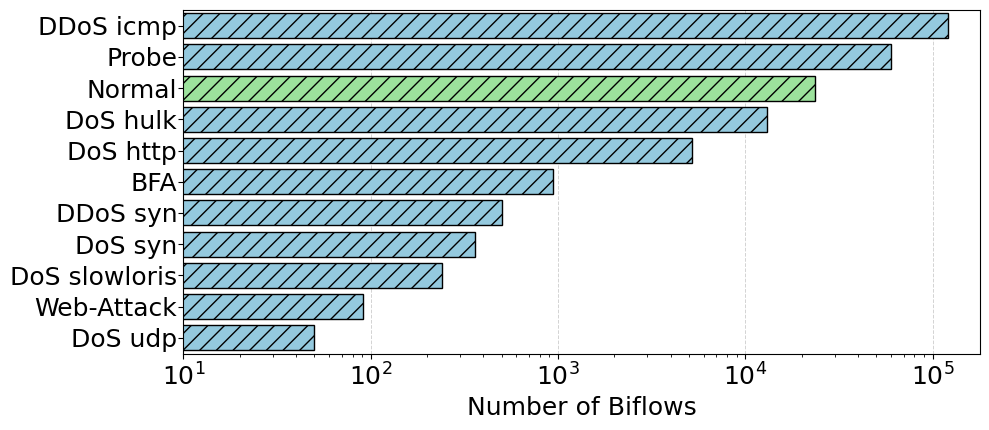

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

# Conta le occorrenze delle etichette
label_counts = df[LABEL].value_counts()
max_count = label_counts.max()
min_count = label_counts.min()

# Altezza proporzionale al numero di classi
fig_height = max(2, 0.40 * len(label_counts))

fig, ax = plt.subplots(1, 1, figsize=(10, fig_height))


# Dizionario palette per personalizzare solo la classe "Normal"
palette_custom = {label: "lightgreen" if label == "Normal" else "skyblue" if is_new_dataset else "orange"
                  for label in label_counts.index}

# Countplot
sns.countplot(
    y=LABEL,
    data=df,
    order=label_counts.index,
    ax=ax,
    hatch="//",
    edgecolor="black",
    palette=palette_custom
)

# Etichette più vicine all’asse Y
ax.tick_params(axis='y', pad=1)

# Sostituzione degli underscore con trattini nelle etichette dell'asse Y
ytick_labels = [label.get_text().replace('_', ' ') for label in ax.get_yticklabels()]
ax.set_yticklabels(ytick_labels)

# Aumenta dimensione font delle etichette sull'asse Y
ax.tick_params(axis='y', labelsize=18)  # Font più grande per yticklabel

# Aumenta dimensione font delle etichette sull'asse X
ax.tick_params(axis='x', labelsize=18)  # Font più grande per xticklabel

# Etichetta asse X
ax.set_xlabel("Number of Biflows", fontsize=18)
ax.set_ylabel("")

# Scala logaritmica
ax.set_xscale('log', base=10)

# Tick principali log
log_ticks = [10, 100, 1000, 10000, 100000]
ax.set_xticks(log_ticks)

# Linee verticali in corrispondenza dei tick principali
for tick in log_ticks:
    ax.axvline(tick, color='lightgray', linestyle='--', lw=0.7, zorder=0)


ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig("class_distribution.pdf", format="pdf")
plt.show()

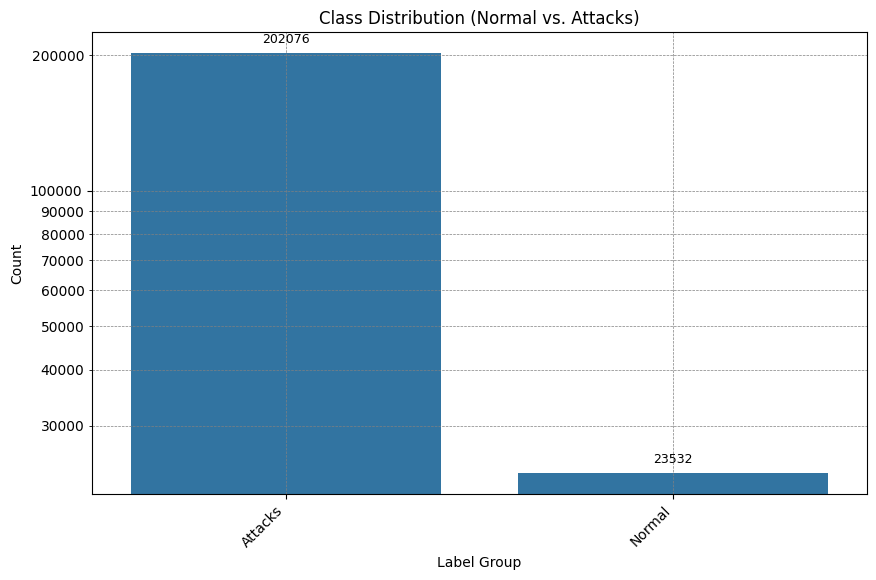

Total: 225608
Normal: 23532 (10.43%)
Attacks: 202076 (89.57%)


In [ ]:
df['LABEL_GROUP'] = df['LABEL-bin'].map({0: 'Normal', 1: 'Attacks'})

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='LABEL_GROUP', data=df, order=df['LABEL_GROUP'].value_counts().index)
plt.title('Class Distribution (Normal vs. Attacks)')
plt.xlabel('Label Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.yscale('log', base=10)

# Ticks asse y in scala logaritmica
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(ScalarFormatter())

# Griglia
plt.grid(ls='--', lw=0.5, c='grey', which='both')

# Etichette sopra le barre (valori interi)
for container in ax.containers:
    for bar in container:
        height = int(bar.get_height())
        ax.annotate(f'{height:}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

# Salvataggio e visualizzazione
plt.savefig('class_distribution_normal_vs_others.png')
plt.show()

# Statistiche
total_count = len(df)
normal_count = len(df[df['LABEL_GROUP'] == 'Normal'])
attack_count = total_count - normal_count

print(f"Total: {total_count}")
print(f"Normal: {normal_count} ({normal_count / total_count * 100:.2f}%)")
print(f"Attacks: {attack_count} ({attack_count / total_count * 100:.2f}%)")


## Boxplots

/tmp/ipython-input-5-3236577645.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


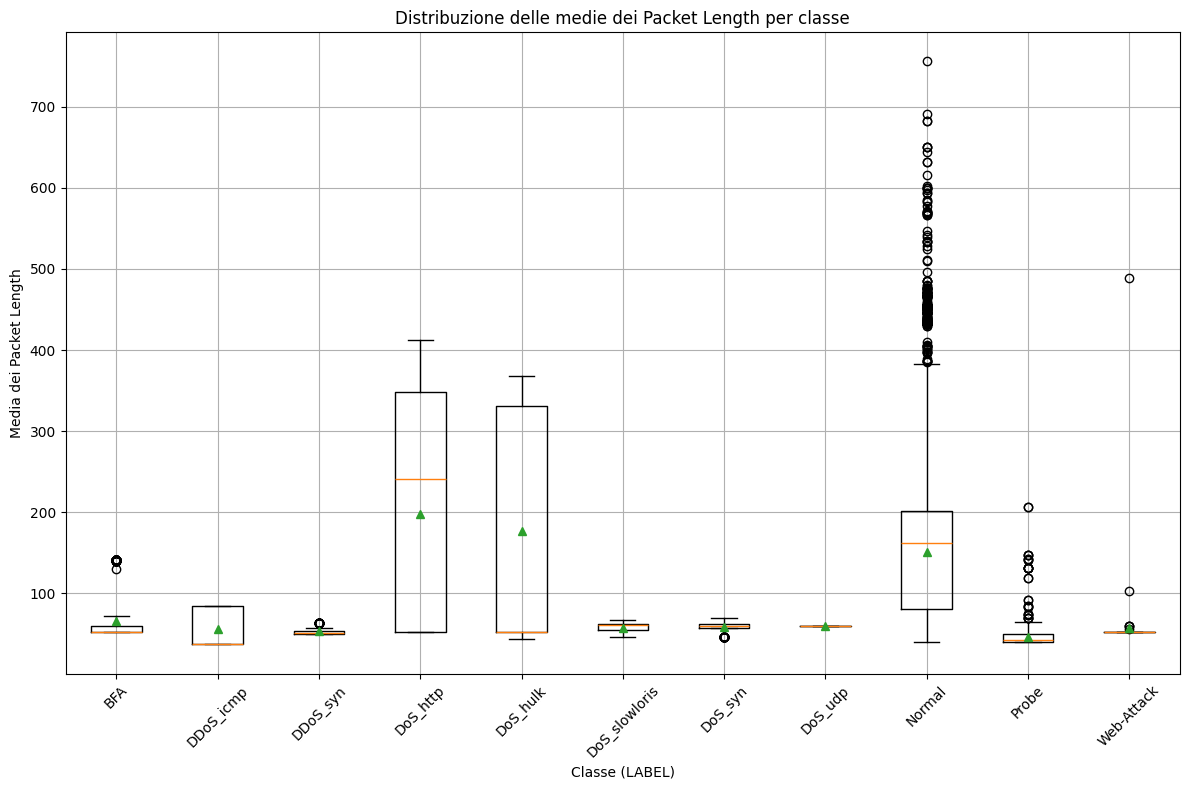

/tmp/ipython-input-5-3236577645.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


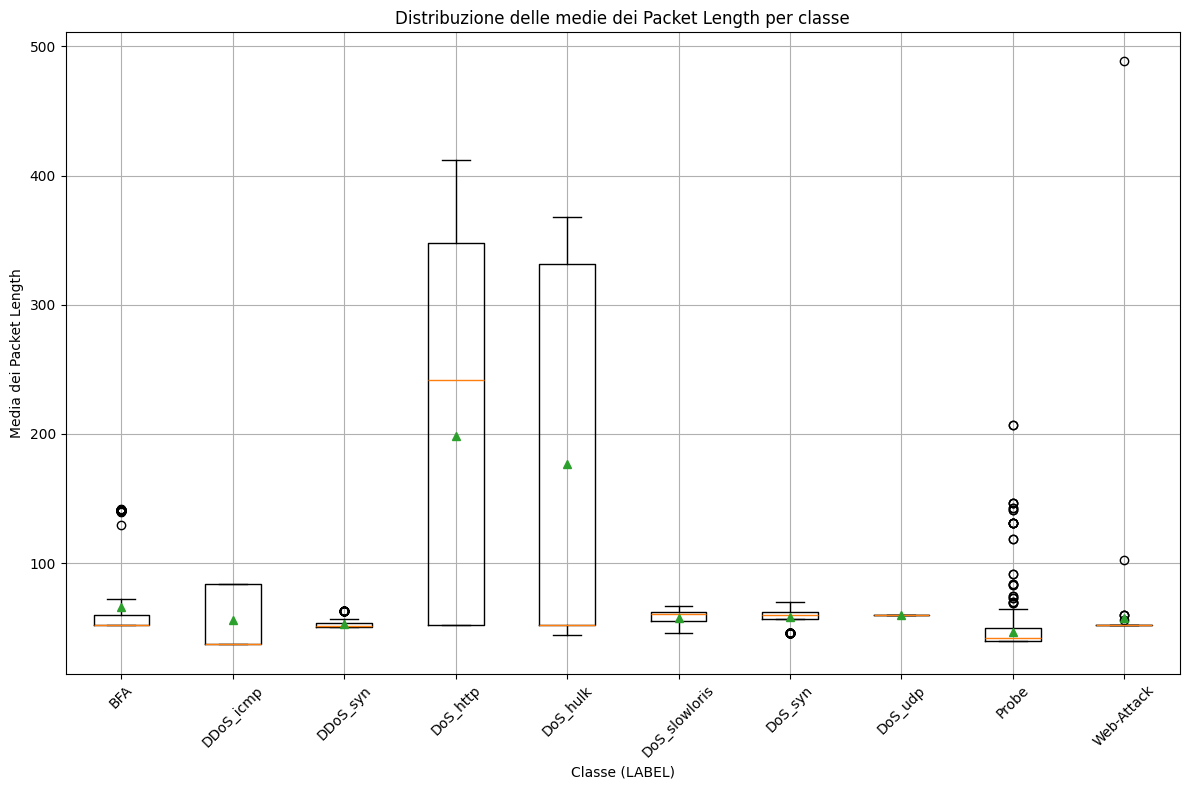

In [ ]:
def preprocess_packet_lengths(df, max_length=20):
    """
    Preprocessa la colonna 'PL' per garantire che ogni array abbia esattamente max_length elementi.
    Riempie con NaN se l'array è più corto.
    """
    def pad_or_truncate(pl_array):
        # Converte l'array in float per supportare NaN
        pl_array = np.array(pl_array, dtype=float)
        if len(pl_array) > max_length: #Se più lungo tronco a 20
            return pl_array[:max_length]
        else: #Se più corto fillo con NaN
            return np.pad(pl_array, (0, max_length - len(pl_array)), constant_values=np.nan)

    df['PL_processed'] = df['PL'].apply(pad_or_truncate)
    return df

def calculate_mean_packet_lengths(df, pl_column='PL_processed'):
    """
    Calcola la media dei packet length per ogni riga.
    """
    df['PL_mean'] = df[pl_column].apply(np.nanmean)  # Calcola la media ignorando i NaN
    return df

def create_boxplots(df, label_column=LABEL, mean_column='PL_mean', nome = ''):
    """
    Crea un unico boxplot per la distribuzione delle medie dei packet length,
    con ogni classe (LABEL) sull'asse X.
    """
    # Raggruppa i dati per LABEL e raccogli le medie
    grouped = df.groupby(label_column)[mean_column].apply(list)

    # Prepara i dati per il boxplot
    labels = grouped.index.tolist()
    data = grouped.tolist()

    # Crea il boxplot
    plt.figure(figsize=(12, 8))
    plt.boxplot(data, labels=labels, showmeans=True)
    plt.title("Distribuzione delle medie dei Packet Length per classe")
    plt.xlabel("Classe (LABEL)")
    plt.ylabel("Media dei Packet Length")
    plt.xticks(rotation=45)  # Ruota le etichette sull'asse X per leggibilità
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(nome+'.png')
    plt.show()


def boxplotta(df, nome):
    df = preprocess_packet_lengths(df)

    # Calcola la media dei packet length
    df = calculate_mean_packet_lengths(df)



    # Crea i boxplot
    create_boxplots(df, nome = nome)

df['PL'] = df['PL'].apply(lambda x: x[:10])
boxplotta(df, 'boxplot')

df_normaldrop = df.drop(df[df[LABEL] == 'Normal'].index)
boxplotta(df_normaldrop, 'boxplot_no_normal')

## Heatmaps


Elaborazione feature: PL...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per PL: min=44.0, max=1414.2543527630583


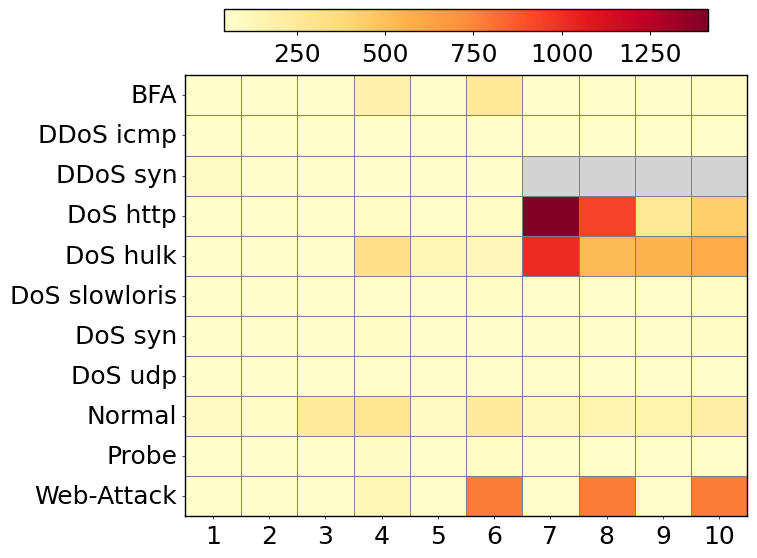

Heatmap salvata per PL in:
→PDF: heatmaps/heatmap_PL.pdf

Elaborazione feature: IAT...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per IAT: min=0.0, max=24098511.40625


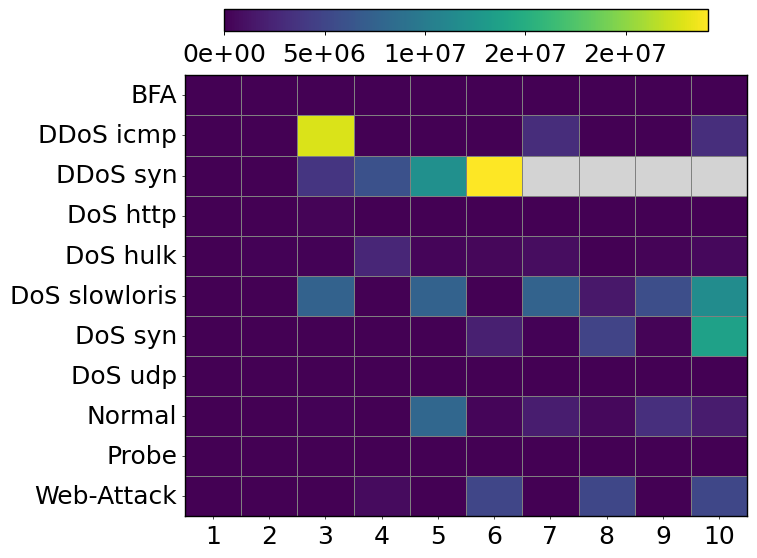

Heatmap salvata per IAT in:
→PDF: heatmaps/heatmap_IAT.pdf

Elaborazione feature: DIR...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per DIR: min=0.0, max=1.0


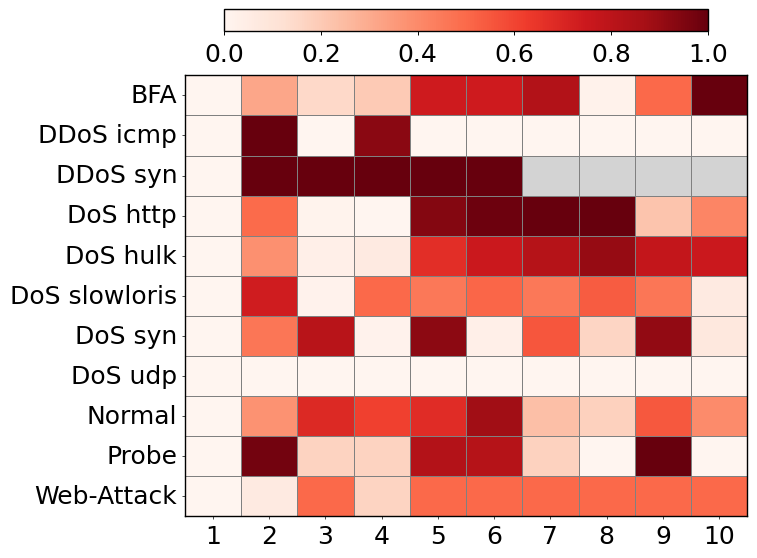

Heatmap salvata per DIR in:
→PDF: heatmaps/heatmap_DIR.pdf

Elaborazione feature: WIN...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per WIN: min=-1.0, max=61962.467398648645


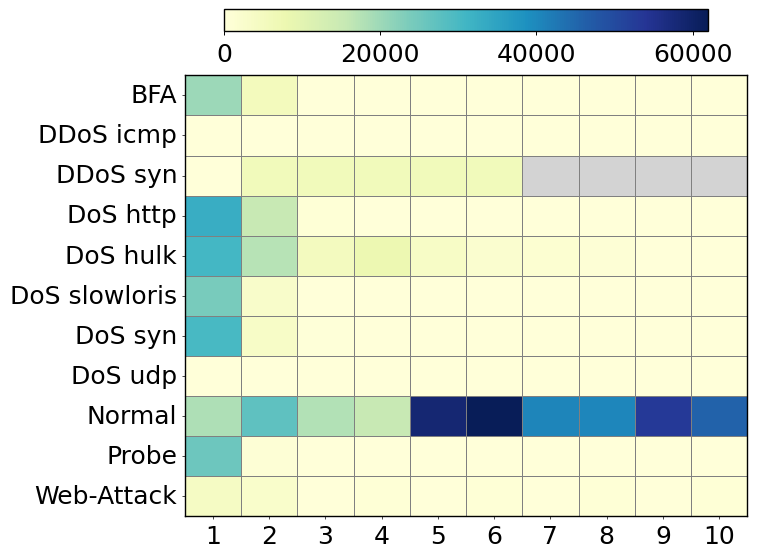

Heatmap salvata per WIN in:
→PDF: heatmaps/heatmap_WIN.pdf

Elaborazione feature: FLG...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per FLG: min=-1.0, max=24.540499621498864


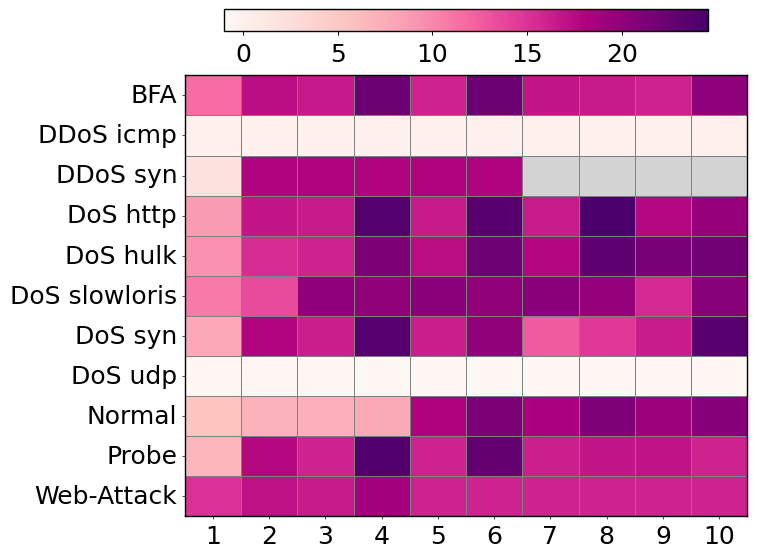

Heatmap salvata per FLG in:
→PDF: heatmaps/heatmap_FLG.pdf

Elaborazione feature: TTL...


/tmp/ipython-input-27-3168162854.py:40: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(matrix, axis=0)


Range valori per TTL: min=52.80202877411656, max=120.31097972972972


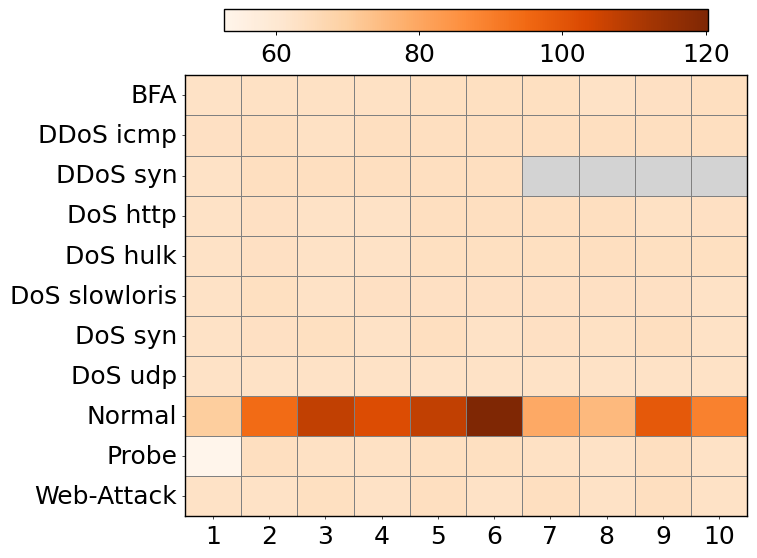

Heatmap salvata per TTL in:
→PDF: heatmaps/heatmap_TTL.pdf

Elaborazione feature: NET...
Range valori per NET: min=0.0, max=189.84


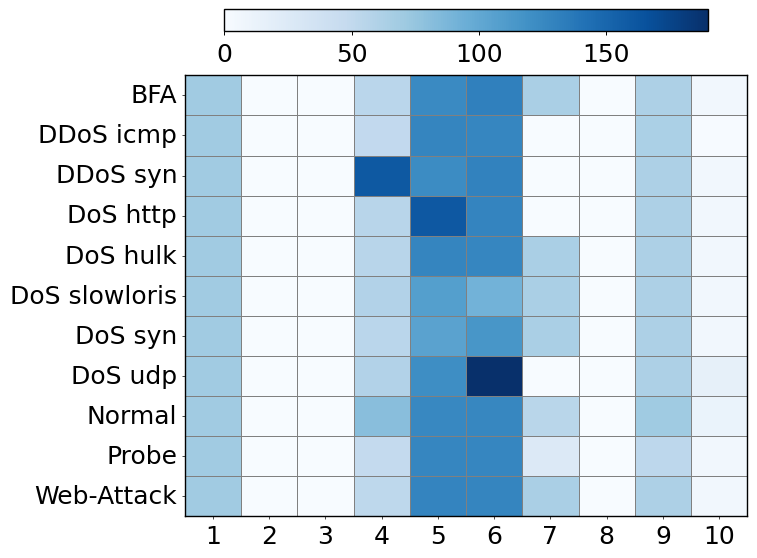

Heatmap salvata per NET in:
→PDF: heatmaps/heatmap_NET.pdf

Elaborazione feature: NET-OBF...
Range valori per NET-OBF: min=0.0, max=189.84


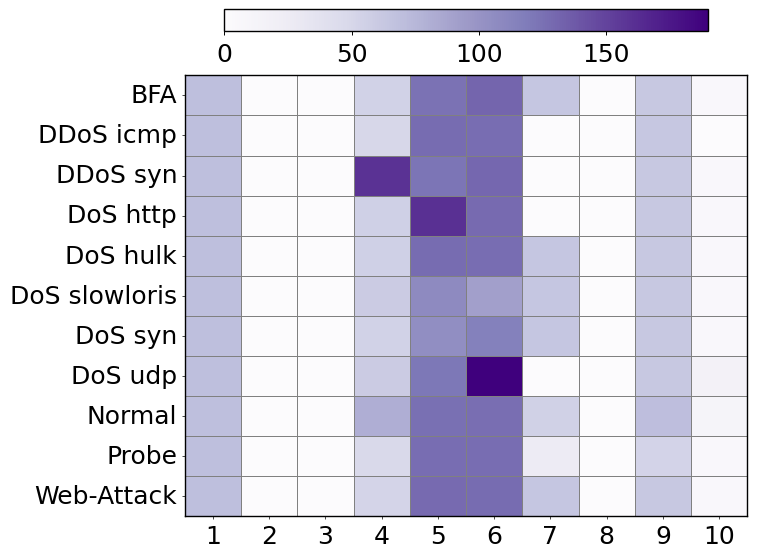

Heatmap salvata per NET-OBF in:
→PDF: heatmaps/heatmap_NET-OBF.pdf

Elaborazione feature: FEAT_PAD...
Attenzione: La colonna 'FEAT_PAD' non sembra contenere array/liste. Contiene: <class 'numpy.int64'>. Salto.
Assicurati che le colonne feature contengano array di valori numerici.

Elaborazione feature: LOAD_PAD...
Attenzione: La colonna 'LOAD_PAD' non sembra contenere array/liste. Contiene: <class 'numpy.int64'>. Salto.
Assicurati che le colonne feature contengano array di valori numerici.

Elaborazione completata.


In [27]:
# --- Configurazione ---
LABEL_COLUMN = LABEL # Colonna usata per raggruppare (le classi)
FEATURE_COLUMNS = ['PL', 'IAT', 'DIR', 'WIN', 'FLG', 'TTL', 'NET', 'NET-OBF', 'FEAT_PAD', 'LOAD_PAD']
NUM_PACKETS = 10 # Numero di pacchetti iniziali da considerare
OUTPUT_DIR = 'heatmaps' # Directory dove salvare le heatmap

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from matplotlib.colors import ListedColormap, LogNorm
from matplotlib.patches import Rectangle
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker



def preprocess_and_calculate_means(df, feature_col, label_col, num_packets):
    def get_first_n_packets(arr):
        if arr is None:
            return np.full(num_packets, np.nan)
        if isinstance(arr, (list, np.ndarray)):
            arr_np = np.array(arr, dtype=float)
            if len(arr_np) < num_packets:
                return np.pad(arr_np, (0, num_packets - len(arr_np)), 'constant', constant_values=np.nan)
            return arr_np[:num_packets]
        return np.full(num_packets, np.nan)

    df_feature = df[[label_col, feature_col]].copy()
    df_feature['truncated_feature'] = df_feature[feature_col].apply(get_first_n_packets)

    class_means = {}
    for label, group in df_feature.groupby(label_col):
        arrays = [arr for arr in group['truncated_feature'] if isinstance(arr, np.ndarray) and not np.all(np.isnan(arr))]
        if len(arrays) > 0:
            matrix = np.vstack(arrays)
            # Gestisce il caso di slice vuote
            with np.errstate(invalid='ignore'):
                mean_values = np.nanmean(matrix, axis=0)
                # Se tutti i valori sono NaN, sostituisce con array di NaN
                if np.all(np.isnan(mean_values)):
                    class_means[label] = np.full(num_packets, np.nan)
                else:
                    class_means[label] = mean_values
        else:
            class_means[label] = np.full(num_packets, np.nan)

    heatmap_data = pd.DataFrame.from_dict(class_means, orient='index', columns=[f'Packet_{i}' for i in range(num_packets)])
    return heatmap_data

def plot_heatmap(data_df, feature_name, output_dir):
    if data_df.empty:
        print(f"Nessun dato da plottare per la feature: {feature_name}")
        return

    # Crea una copia dei dati per evitare modifiche indesiderate
    data_filtered = data_df.copy()

    # Stampa per debug
    print(f"Range valori per {feature_name}: min={data_filtered.min().min()}, max={data_filtered.max().max()}")

    # Dimensioni più compatte e proporzionate
    n_cols = len(data_filtered.columns)
    n_rows = len(data_filtered.index)

    # Calcolo dimensioni per ottenere celle più rettangolari
    cell_width = 0.55  # Larghezza celle aumentata
    cell_height = 0.35  # Altezza celle aumentata

    # Dimensioni figura
    fig_width = n_cols * cell_width + 2  # Più spazio per etichette
    fig_height = n_rows * cell_height + 3.5  # Più spazio per titolo e colorbar

    # Crea figura con dimensioni calcolate
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # Imposta il layout: l'heatmap occupa la parte inferiore, lasciando spazio sopra per la colorbar
    plt.subplots_adjust(left=0.20, bottom=0.15, right=0.95, top=0.75)  # Più spazio sopra

    # Palette di colori in base alla feature
    palettes = {
        "PL": "YlOrRd",       # Rosso-arancio per lunghezze pacchetti
        "IAT": "viridis",     # Verde-blu per tempi
        "DIR": "Reds",        # Monobanda rosso
        "WIN": "YlGnBu",      # Verde-blu per finestre
        "FLG": "RdPu",        # Viola-rosso per flag
        "TTL": "Oranges",     # Arancio per TTL
        "NET": "Blues",       # Blu per distanza di rete
        "NET-OBF": "Purples", # Viola per obfuscamento
        "FEAT_PAD": "Greys",  # Grigi per feature padding
        "LOAD_PAD": "Greys"   # Grigi per load padding
    }

    cmap = sns.color_palette(palettes.get(feature_name, "viridis"), as_cmap=True)
    cmap_with_nan = ListedColormap(cmap(np.linspace(0, 1, 256)))
    cmap_with_nan.set_bad(color='lightgray')  # Celle NaN grigie chiare

    # Creazione della maschera per i NaN
    mask_nan = data_filtered.isna()

    # Heatmap senza annotazioni NaN
    im = sns.heatmap(
        data_filtered,
        ax=ax,
        annot=False,
        fmt=".1f",
        cmap=cmap_with_nan,
        mask=mask_nan,
        linewidths=0.5,
        linecolor='gray',
        cbar=False,
        square=False,
        xticklabels=True,
        yticklabels=True,
    )

    # Colorbar sopra con la stessa larghezza dell'heatmap
    ax_pos = ax.get_position()  # Ottiene la posizione dell'heatmap

    cbar_width = ax_pos.width * 0.86  # 90% della larghezza dell'heatmap
    cbar_left = ax_pos.x0 + (ax_pos.width - cbar_width) / 2  # centro orizzontale

    cbar_ax = fig.add_axes([cbar_left, ax_pos.y1 + 0.06, cbar_width, 0.03])

    cbar = fig.colorbar(
        im.collections[0],
        cax=cbar_ax,
        orientation='horizontal'
    )

    if feature_name == "IAT":
      # Imposta la notazione scientifica direttamente sui tick, evitando offset "1eX"
      cbar.ax.ticklabel_format(style='scientific', axis='x', scilimits=(0, 0))

      # Nasconde l'etichetta offset ("1e7", ecc.)
      cbar.ax.xaxis.offsetText.set_visible(False)

      # Formatta i tick principali come esponenziali
      formatter = ticker.FuncFormatter(lambda x, _: f'{x:.0e}')
      cbar.ax.xaxis.set_major_formatter(formatter)

    # Stile colorbar
    cbar.ax.tick_params(labelsize=18, length=3, width=0.7, pad=5)
    cbar.outline.set_edgecolor('black')
    cbar.outline.set_linewidth(1)

    # Tick degli assi
    ax.set_xticks(np.arange(len(data_filtered.columns)) + 0.5)
    ax.set_xticklabels(range(1, len(data_filtered.columns) + 1), fontsize=18)  # Parti da 1
    ax.set_yticks(np.arange(len(data_filtered.index)) + 0.5)
    ax.set_yticklabels(data_filtered.index, fontsize=15, rotation=0)


    # Tick parameters
    ax.tick_params(axis='both', which='major', labelsize=18, length=2, width=0.5)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', rotation=0)

    # Rimuove underscore dalle etichette Y (classi reali/predette)
    ax.set_yticklabels([label.get_text().replace('_', ' ') for label in ax.get_yticklabels()])

    # Rimuove underscore dalle etichette X (se presenti)
    ax.set_xticklabels([label.get_text().replace('_', ' ') for label in ax.get_xticklabels()])

    # BORDINO NERO ATTORNO ALL'HEATMAP
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
        spine.set_visible(True)

    # Salvataggi
    os.makedirs(output_dir, exist_ok=True)
    path_pdf = os.path.join(output_dir, f'heatmap_{feature_name}.pdf')

    plt.savefig(path_pdf, bbox_inches='tight', dpi=300, facecolor='white')
    #plt.savefig(path_pdf, bbox_inches=None, dpi=300, facecolor='white', pad_inches=5.5)
    plt.show()

    print(f"Heatmap salvata per {feature_name} in:\n→PDF: {path_pdf}")




# Loop principale
for feature in FEATURE_COLUMNS:
    print(f"\nElaborazione feature: {feature}...")
    if feature not in df.columns:
        print(f"Attenzione: La colonna feature '{feature}' non è presente nel DataFrame. Salto.")
        continue

    # Controlla se la colonna feature contiene effettivamente dati iterabili (liste/array)
    sample_value = df[feature].dropna().iloc[0] if not df[feature].dropna().empty else None
    if sample_value is None or not isinstance(sample_value, (list, np.ndarray, pd.Series)):
          print(f"Attenzione: La colonna '{feature}' non sembra contenere array/liste. Contiene: {type(sample_value)}. Salto.")
          print("Assicurati che le colonne feature contengano array di valori numerici.")
          continue

    heatmap_df = preprocess_and_calculate_means(df, feature, LABEL_COLUMN, NUM_PACKETS)

    if not heatmap_df.empty:
        plot_heatmap(heatmap_df, feature, OUTPUT_DIR)
    else:
        print(f"Nessun dato per la heatmap generato per la feature: {feature}")

print("\nElaborazione completata.")

## Random Forest

Dimensioni dei dataset:
X_train: (180486, 80), y_train: (180486,)
X_test: (45122, 80), y_test: (45122,)

Addestramento del Random Forest Classifier...

Accuracy: 0.9982
F1 Score (macro): 0.9327
F1 Score (weighted): 0.9981

Report di classificazione:
               precision    recall  f1-score   support

          BFA       0.96      0.87      0.91       188
    DDoS_icmp       1.00      1.00      1.00     24266
     DDoS_syn       1.00      1.00      1.00       100
     DoS_http       1.00      1.00      1.00      1040
     DoS_hulk       1.00      1.00      1.00      2607
DoS_slowloris       0.75      0.92      0.82        48
      DoS_syn       0.83      0.42      0.56        72
      DoS_udp       1.00      1.00      1.00        10
       Normal       1.00      1.00      1.00      4706
        Probe       1.00      1.00      1.00     12067
   Web-Attack       1.00      0.94      0.97        18

     accuracy                           1.00     45122
    macro avg       0.96      0.9

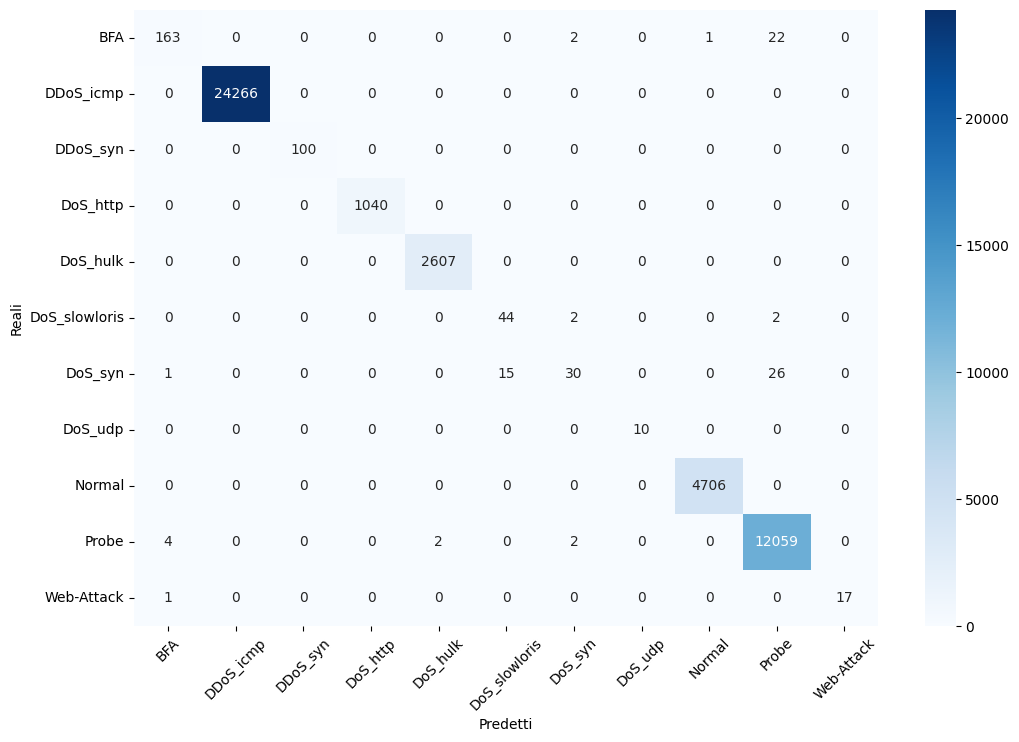

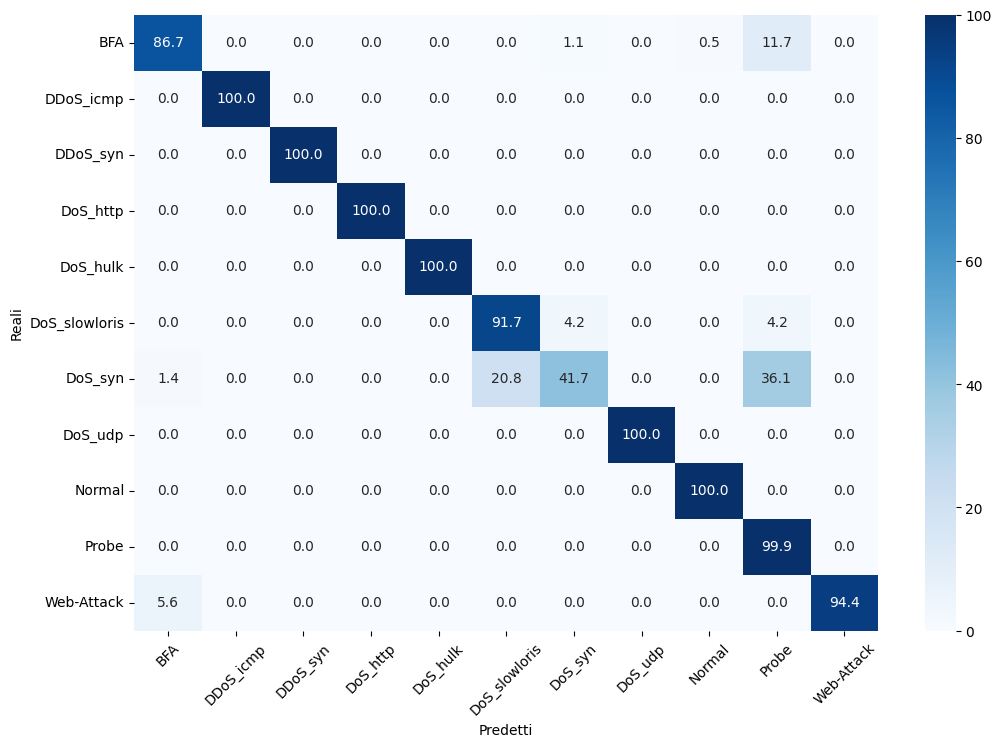


Top 20 Feature Importances:
      feature  importance
69      NET_9    0.098850
79  NET-OBF_9    0.087435
41      FLG_1    0.080544
40      FLG_0    0.079160
30      WIN_0    0.067303
68      NET_8    0.047537
78  NET-OBF_8    0.044267
50      TTL_0    0.042087
11      IAT_1    0.033975
1        PL_1    0.032040
73  NET-OBF_3    0.029933
31      WIN_1    0.028958
66      NET_6    0.028149
76  NET-OBF_6    0.023472
0        PL_0    0.022255
32      WIN_2    0.022117
21      DIR_1    0.021615
63      NET_3    0.019007
33      WIN_3    0.017791
12      IAT_2    0.016249


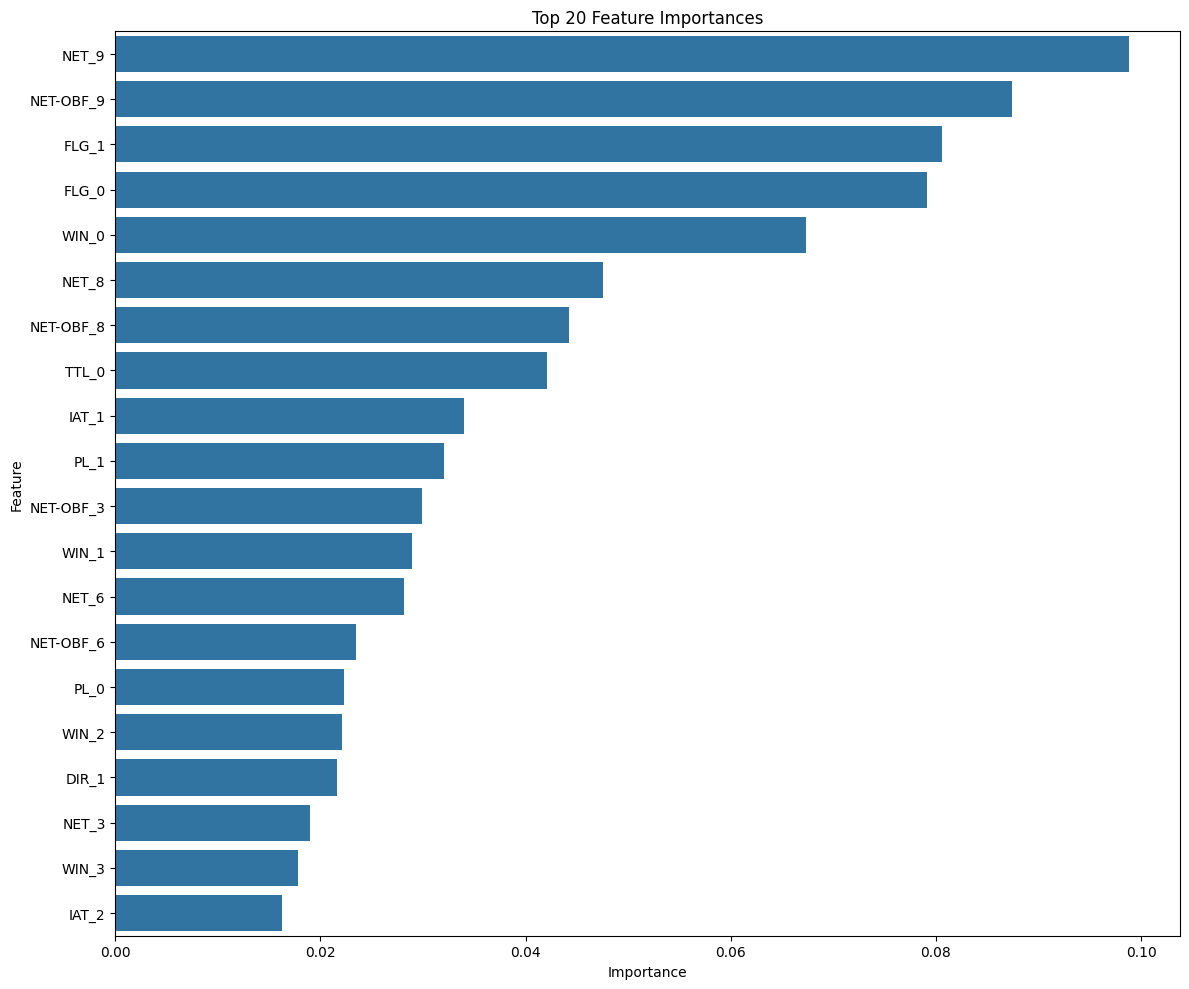

In [ ]:
# ---------------- CONFIGURAZIONE ----------------
array_features_to_use = ['PL', 'IAT', 'DIR', 'WIN', 'FLG', 'TTL', 'NET', 'NET-OBF']
num_elements_to_use = 10
include_FEAT_PAD = False
include_LOAD_PAD = False
target_column = LABEL

# ---------------- ESTRAZIONE FEATURE ----------------
X = pd.DataFrame()

def extract_elements(arr, n):
    if arr is None or not isinstance(arr, (list, np.ndarray)):
        return [np.nan] * n
    arr_np = np.array(arr, dtype=float)
    if len(arr_np) < n:
        return np.pad(arr_np, (0, n - len(arr_np)), 'constant', constant_values=np.nan).tolist()
    return arr_np[:n].tolist()

for feature in array_features_to_use:
    if feature in df.columns:
        extracted_data = df[feature].apply(lambda x: extract_elements(x, num_elements_to_use))
        for i in range(num_elements_to_use):
            X[f'{feature}_{i}'] = extracted_data.apply(lambda x: x[i])

if include_FEAT_PAD and 'FEAT_PAD' in df.columns:
    X['FEAT_PAD'] = df['FEAT_PAD']

if include_LOAD_PAD and 'LOAD_PAD' in df.columns:
    X['LOAD_PAD'] = df['LOAD_PAD']

# ---------------- TARGET E IMPUTAZIONE ----------------
y = df[target_column]

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ---------------- SPLIT E NORMALIZZAZIONE ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dimensioni dei dataset:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# ---------------- MODELLO ----------------
print("\nAddestramento del Random Forest Classifier...")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# ---------------- VALUTAZIONE ----------------
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1_macro:.4f}")
print(f"F1 Score (weighted): {f1_weighted:.4f}")

print("\nReport di classificazione:")
print(classification_report(y_test, y_pred))

# ---------------- MATRICE DI CONFUSIONE ----------------
output_dir = "rf"
os.makedirs(output_dir, exist_ok=True)
attack_labels = np.unique(y)
plt.figure(figsize=(12,8))
plt.plot()
cm = confusion_matrix(y_test, y_pred, labels=attack_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=attack_labels, yticklabels=attack_labels)
plt.xlabel('Predetti')
plt.ylabel('Reali')
plt.xticks(rotation=45)
plt.savefig('rf/confusion_matrix_rf_abs.png',)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot()
cm_norm = confusion_matrix(y_test, y_pred, labels=attack_labels, normalize='true')
sns.heatmap(cm_norm*100, annot=True, fmt='.1f', cmap='Blues', vmax=100, xticklabels=attack_labels, yticklabels=attack_labels)
plt.xlabel('Predetti')
plt.ylabel('Reali')
plt.xticks(rotation=45)

plt.savefig('rf/confusion_matrix_rf_perc.png')
plt.show()


Top 20 Feature Importances:
      feature  importance
69      NET_9    0.098850
79  NET-OBF_9    0.087435
41      FLG_1    0.080544
40      FLG_0    0.079160
30      WIN_0    0.067303
68      NET_8    0.047537
78  NET-OBF_8    0.044267
50      TTL_0    0.042087
11      IAT_1    0.033975
1        PL_1    0.032040
73  NET-OBF_3    0.029933
31      WIN_1    0.028958
66      NET_6    0.028149
76  NET-OBF_6    0.023472
0        PL_0    0.022255
32      WIN_2    0.022117
21      DIR_1    0.021615
63      NET_3    0.019007
33      WIN_3    0.017791
12      IAT_2    0.016249


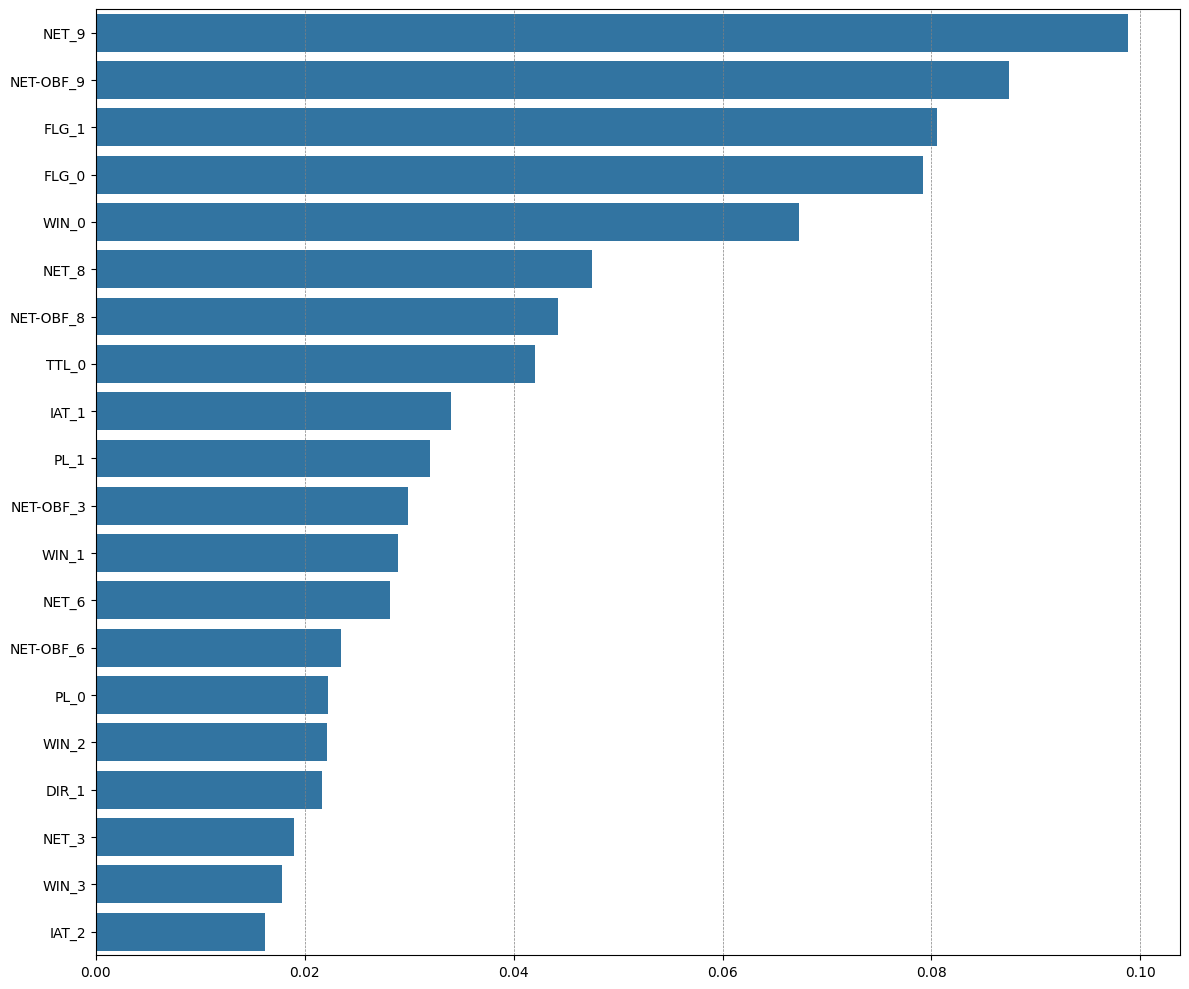

In [ ]:
# ---------------- FEATURE IMPORTANCE ----------------
if hasattr(rf_classifier, "feature_importances_"):
    n_top_features = 20
    importances = rf_classifier.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(
        {"feature": feature_names, "importance": importances}
    )
    feature_importance_df = feature_importance_df.sort_values(
        "importance", ascending=False
    )

    print(f"\nTop {n_top_features} Feature Importances:")
    print(feature_importance_df.head(n_top_features))

    plt.figure(figsize=(12, 10))
    plt.grid(ls="--", lw=0.5, c="grey", which="both")
    sns.barplot(
        x="importance", y="feature", data=feature_importance_df.head(n_top_features)
    )
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()
    plt.savefig("rf/feature_importance_random_forest.png")
    plt.show()

## Analisi Packet Lenght

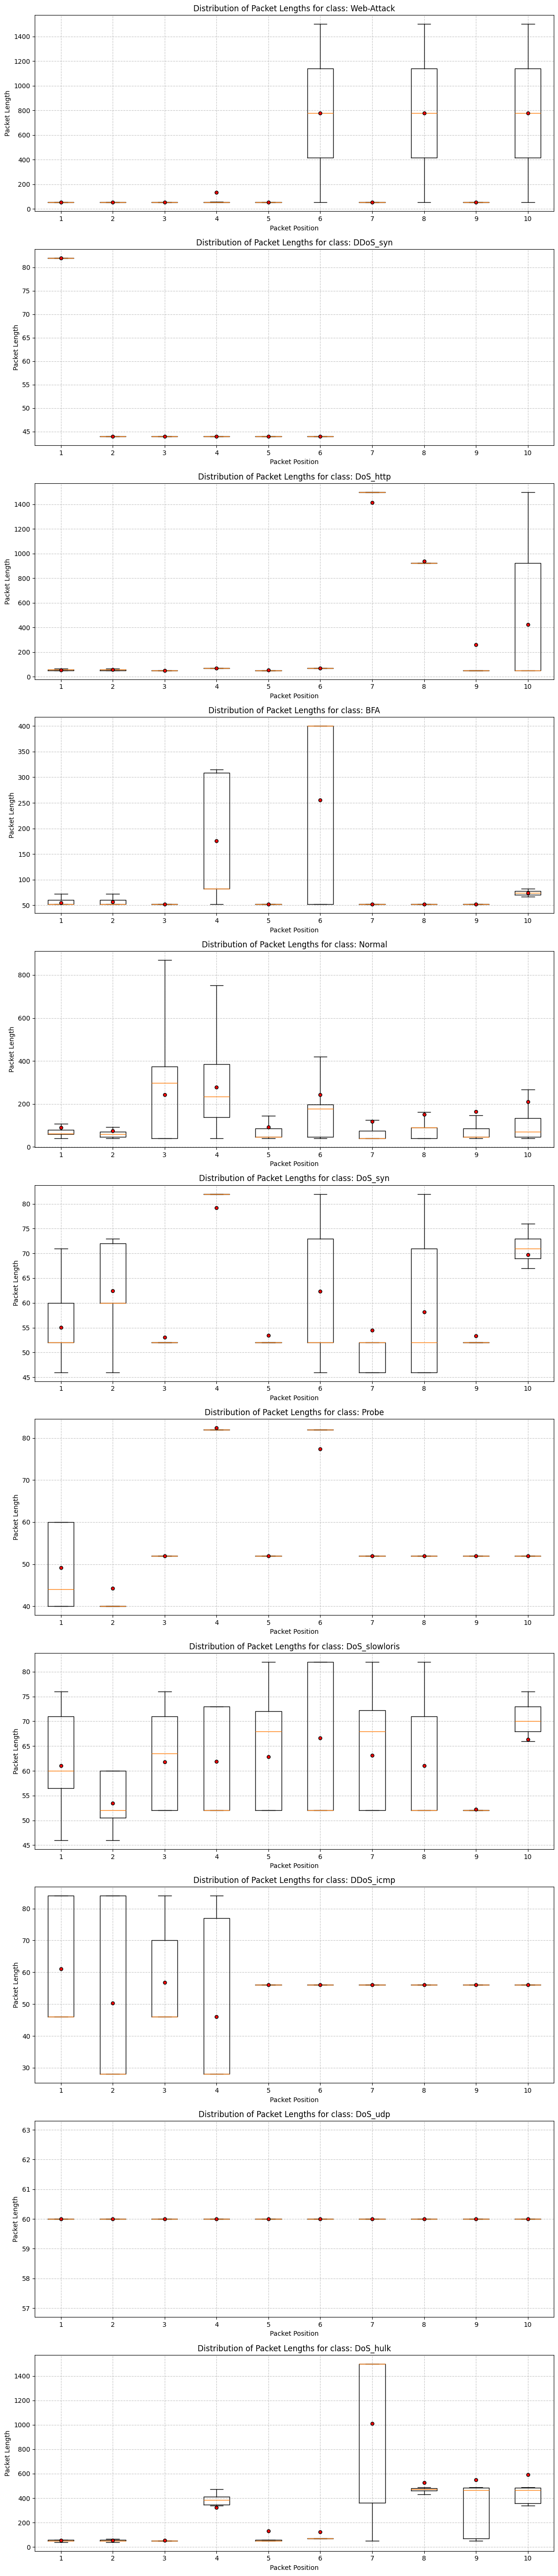

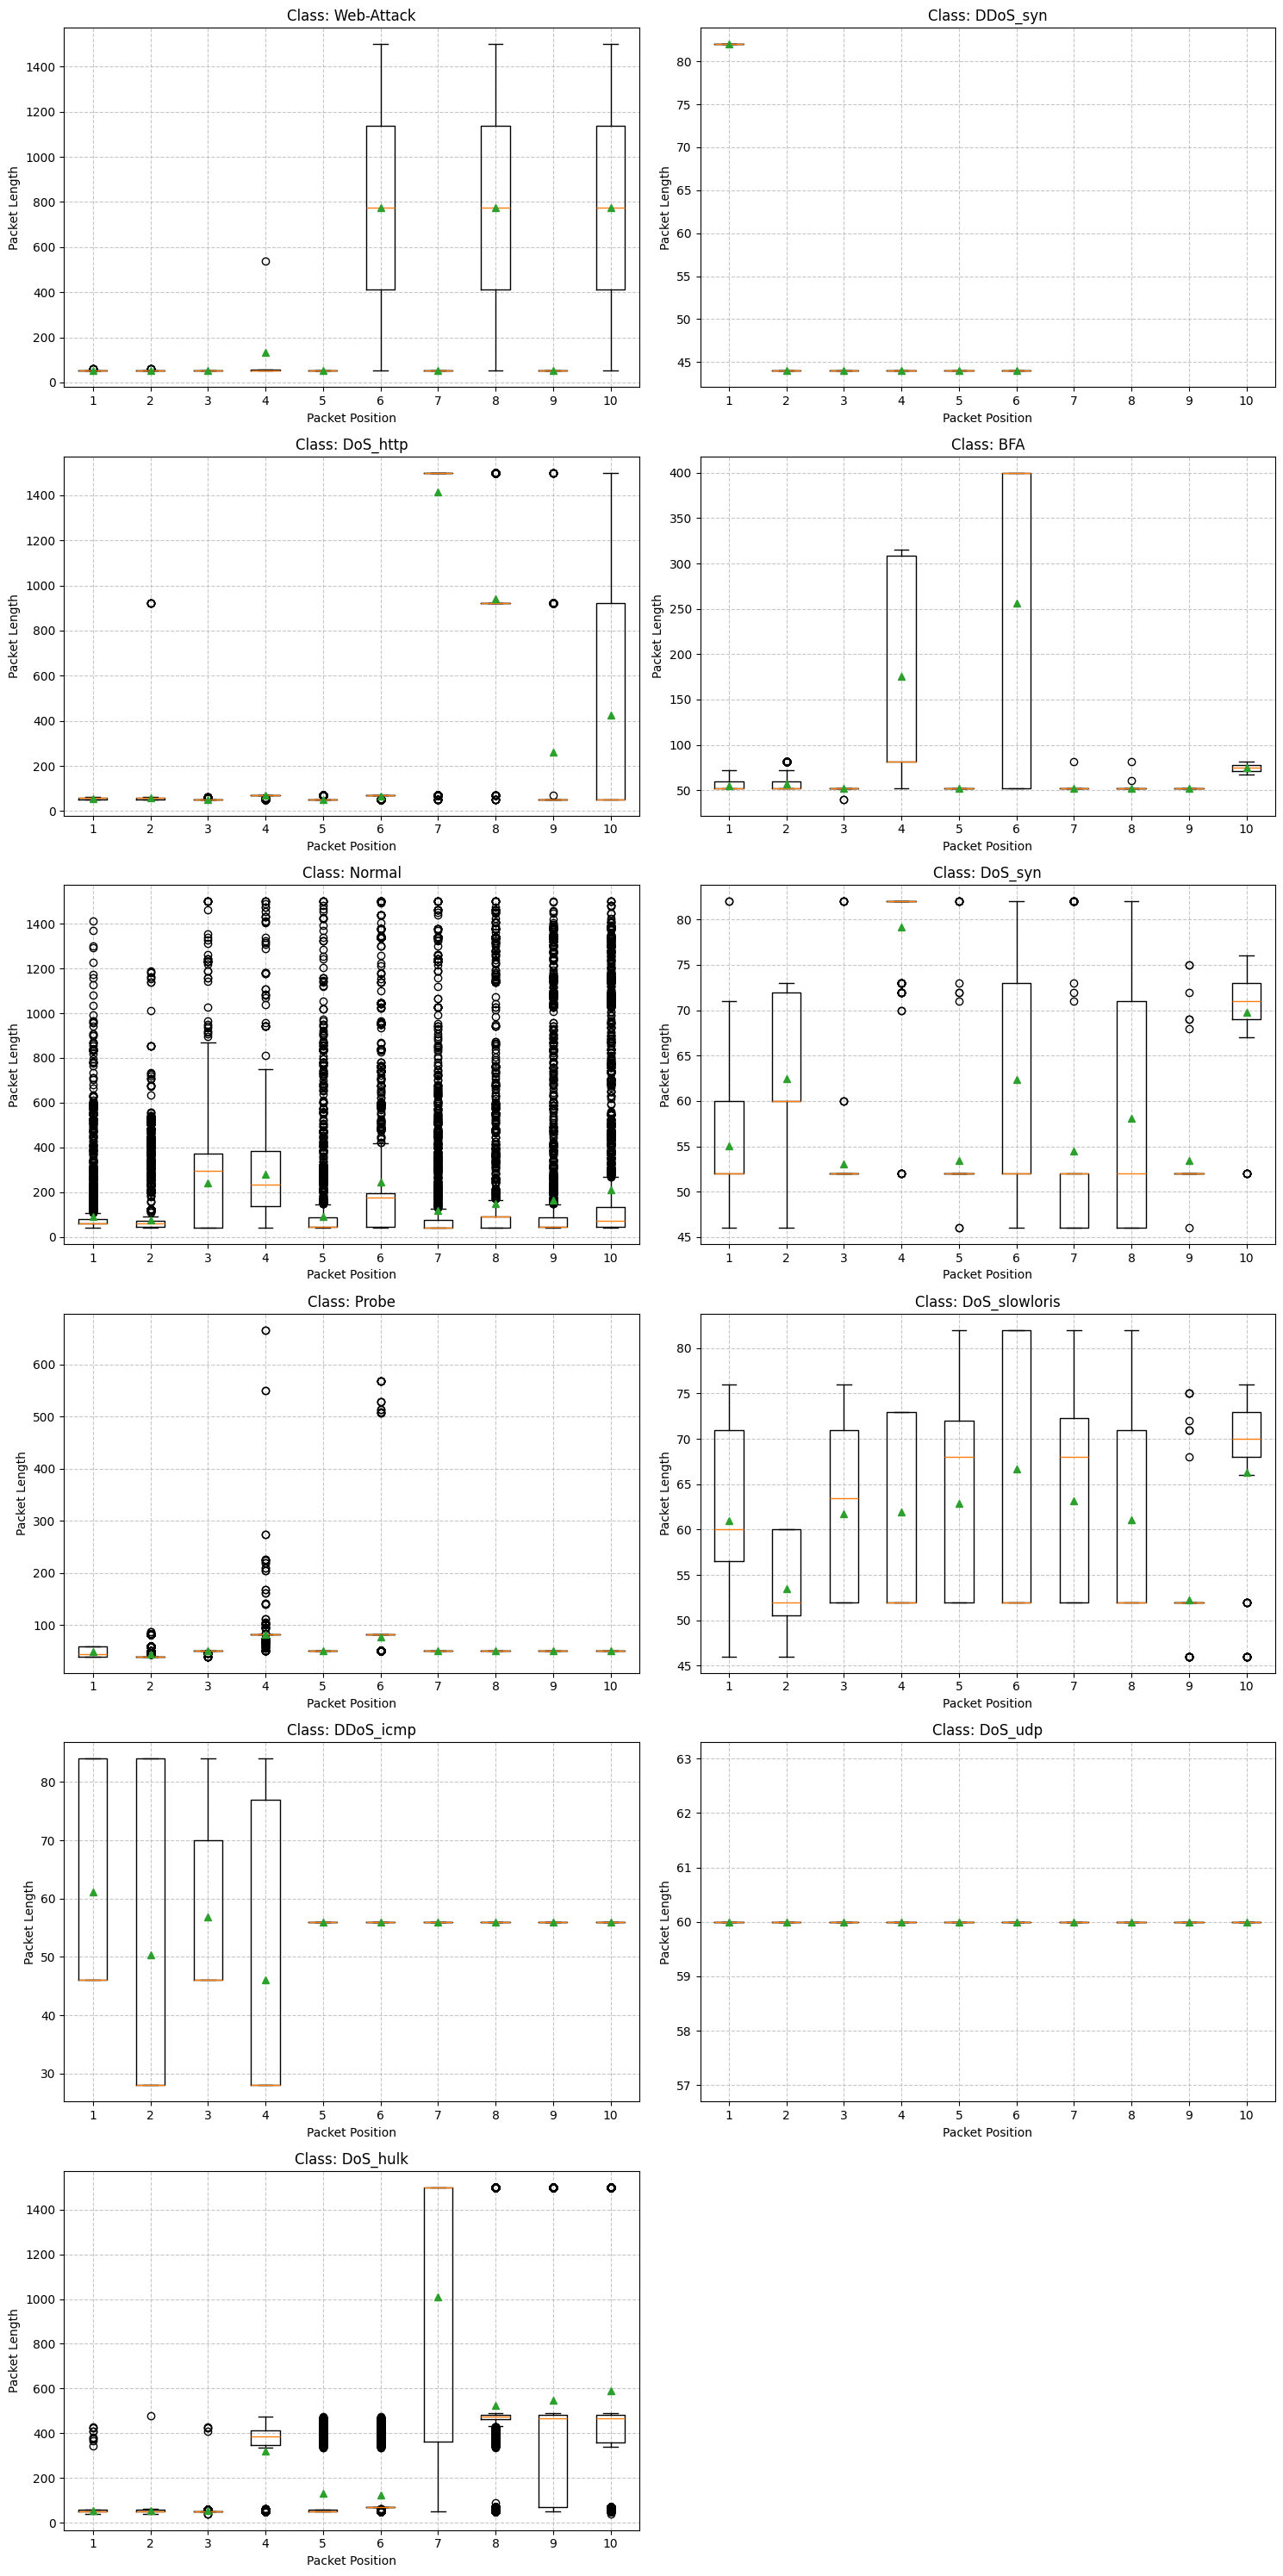

In [ ]:
# Create boxplots for each LABEL class showing distribution of packet lengths for first 10 packets

# Define the number of packets to analyze
num_packets = 10

output_dir = "boxplots"
os.makedirs(output_dir, exist_ok=True)

# Preprocess the PL column to ensure all arrays have exactly 10 elements
def preprocess_packet_lengths(df, max_length=10):
    """Preprocesses the PL column to ensure each array has exactly max_length elements.
    Fills with NaN if the array is shorter than max_length."""

    def pad_or_truncate(pl_array):
        if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
            return np.full(max_length, np.nan)

        pl_array = np.array(pl_array, dtype=float)
        if len(pl_array) > max_length:
            return pl_array[:max_length]  # Truncate if longer
        else:
            return np.pad(pl_array, (0, max_length - len(pl_array)),
                          constant_values=np.nan)  # Pad with NaN if shorter

    return df['PL'].apply(pad_or_truncate)

# Create a list to store processed arrays for each row
processed_arrays = preprocess_packet_lengths(df)

# Create a DataFrame where each row is a flow and each column is a packet position
df_packets = pd.DataFrame(processed_arrays.tolist(),
                         columns=[f'Packet_{i+1}' for i in range(num_packets)],
                         index=df.index)

# Add the class label to the DataFrame
df_packets[LABEL] = df[LABEL]

# Get unique class labels
unique_classes = df[LABEL].unique()

# Set up the figure for subplots - one plot per class
num_classes = len(unique_classes)
fig, axes = plt.subplots(num_classes, 1, figsize=(12, 5 * num_classes))

# If there's only one class, make axes into a list for consistent handling
if num_classes == 1:
    axes = [axes]

# Create a boxplot for each class
for i, class_label in enumerate(unique_classes):
    # Filter data for this class
    class_data = df_packets[df_packets[LABEL] == class_label].iloc[:, :num_packets]

    # Get data for boxplot - each column becomes a box
    data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

    # Create boxplot
    axes[i].boxplot(data_to_plot, showmeans=True, meanprops={'marker':'o',
                                                 'markerfacecolor':'red',
                                                 'markeredgecolor':'black',
                                                'markersize':5},
                                                showfliers=False)

    axes[i].set_title(f'Distribution of Packet Lengths for class: {class_label}')
    axes[i].set_xlabel('Packet Position')
    axes[i].set_ylabel('Packet Length')
    axes[i].set_xticks(range(1, num_packets + 1))
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
filepath = os.path.join(output_dir, 'packet_length_distributions_by_class.png')
plt.savefig(filepath)
plt.show()

# For better visualization especially with many classes, we can also create
# a grid of subplots (optimize layout based on number of classes)
num_classes = len(unique_classes)
max_cols = 2  # Maximum number of columns in the grid
num_rows = (num_classes + max_cols - 1) // max_cols  # Calculate needed rows

fig, axes = plt.subplots(num_rows, max_cols, figsize=(15, 5 * num_rows))
# Flatten axes array for easier indexing
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Create a boxplot for each class in the grid layout
for i, class_label in enumerate(unique_classes):
    if i < len(axes):
        # Filter data for this class
        class_data = df_packets[df_packets[LABEL] == class_label].iloc[:, :num_packets]

        # Get data for boxplot
        data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

        # Create boxplot
        axes[i].boxplot(data_to_plot, showmeans=True)
        axes[i].set_title(f'Class: {class_label}')
        axes[i].set_xlabel('Packet Position')
        axes[i].set_ylabel('Packet Length')
        axes[i].set_xticks(range(1, num_packets + 1))
        axes[i].grid(True, linestyle='--', alpha=0.7)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
filepath = os.path.join(output_dir, "packet_length_grid_by_class.png")
plt.savefig(filepath)
plt.show()

# Prepara la cartella per i singoli boxplot per classe
output_dir = "boxplots/per_class"
os.makedirs(output_dir, exist_ok=True)

# Crea e salva un boxplot per ogni classe
for class_label in unique_classes:
    # Filtra i dati per la classe corrente
    class_data = df_packets[df_packets[LABEL] == class_label].iloc[:, :num_packets]
    data_to_plot = [class_data[f"Packet_{j+1}"].dropna() for j in range(num_packets)]

    # Crea figura
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(
        data_to_plot,
        showmeans=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "red",
            "markeredgecolor": "black",
            "markersize": 5,
        },
        showfliers=False,
    )

    ax.set_title(f"Distribution of Packet Lengths - Class: {class_label}")
    ax.set_xlabel("Packet Position")
    ax.set_ylabel("Packet Length")
    ax.set_xticks(range(1, num_packets + 1))
    ax.grid(True, linestyle="--", alpha=0.7)

    # Salva nella cartella 'boxplots'
    filename = f"class_{str(class_label).replace(' ', '_')}.png"
    filepath = os.path.join(output_dir, filename)
    plt.tight_layout()
    plt.savefig(filepath)
    plt.close(fig)  # Chiudi la figura per liberare memoria

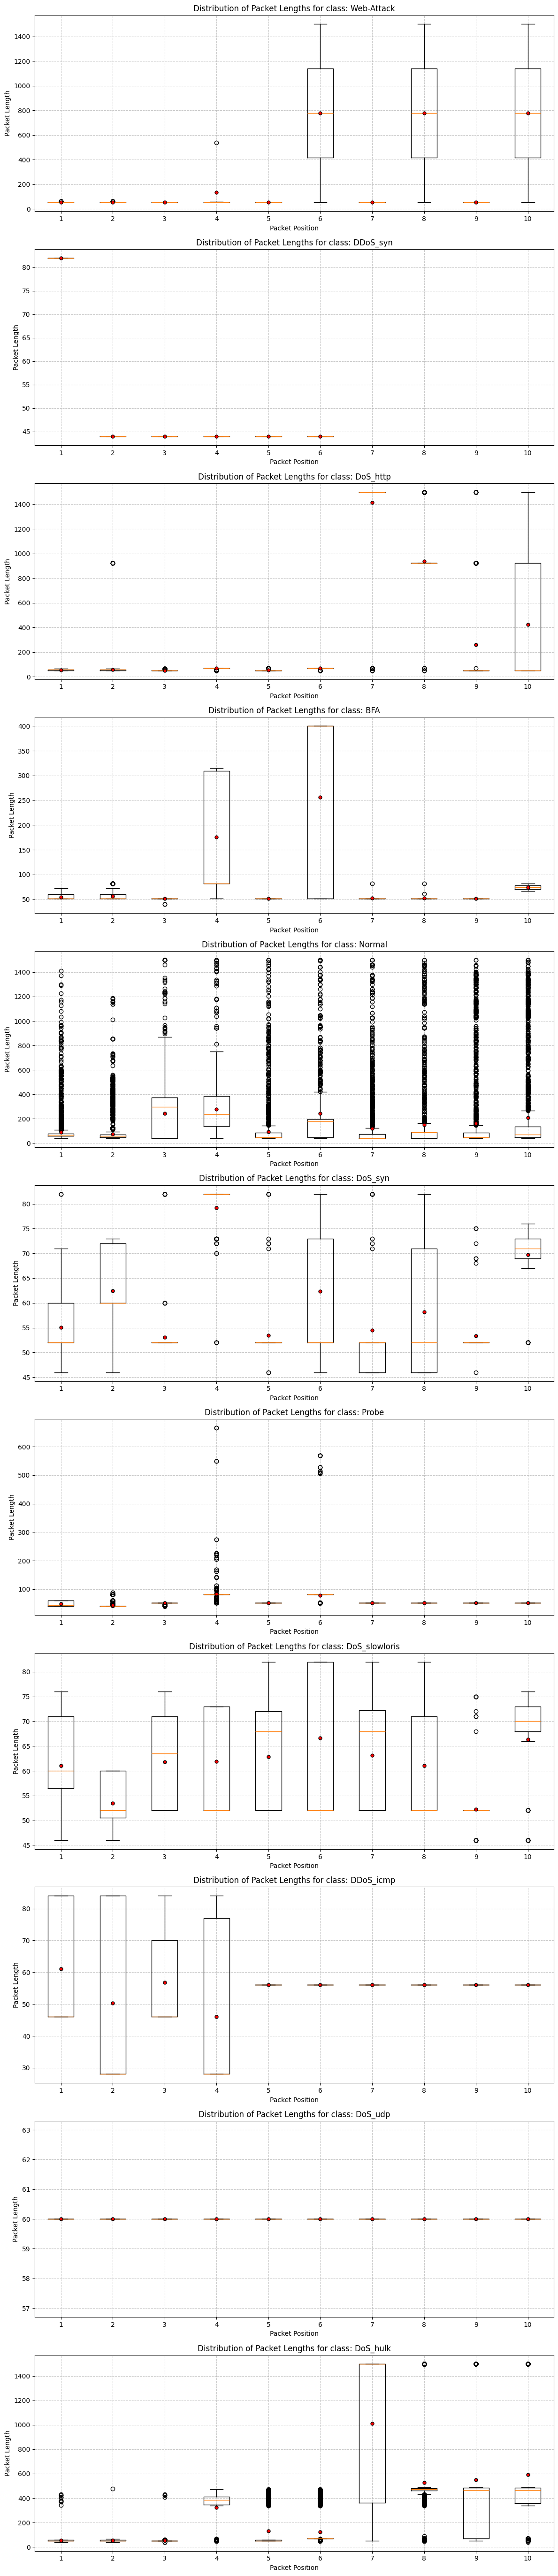

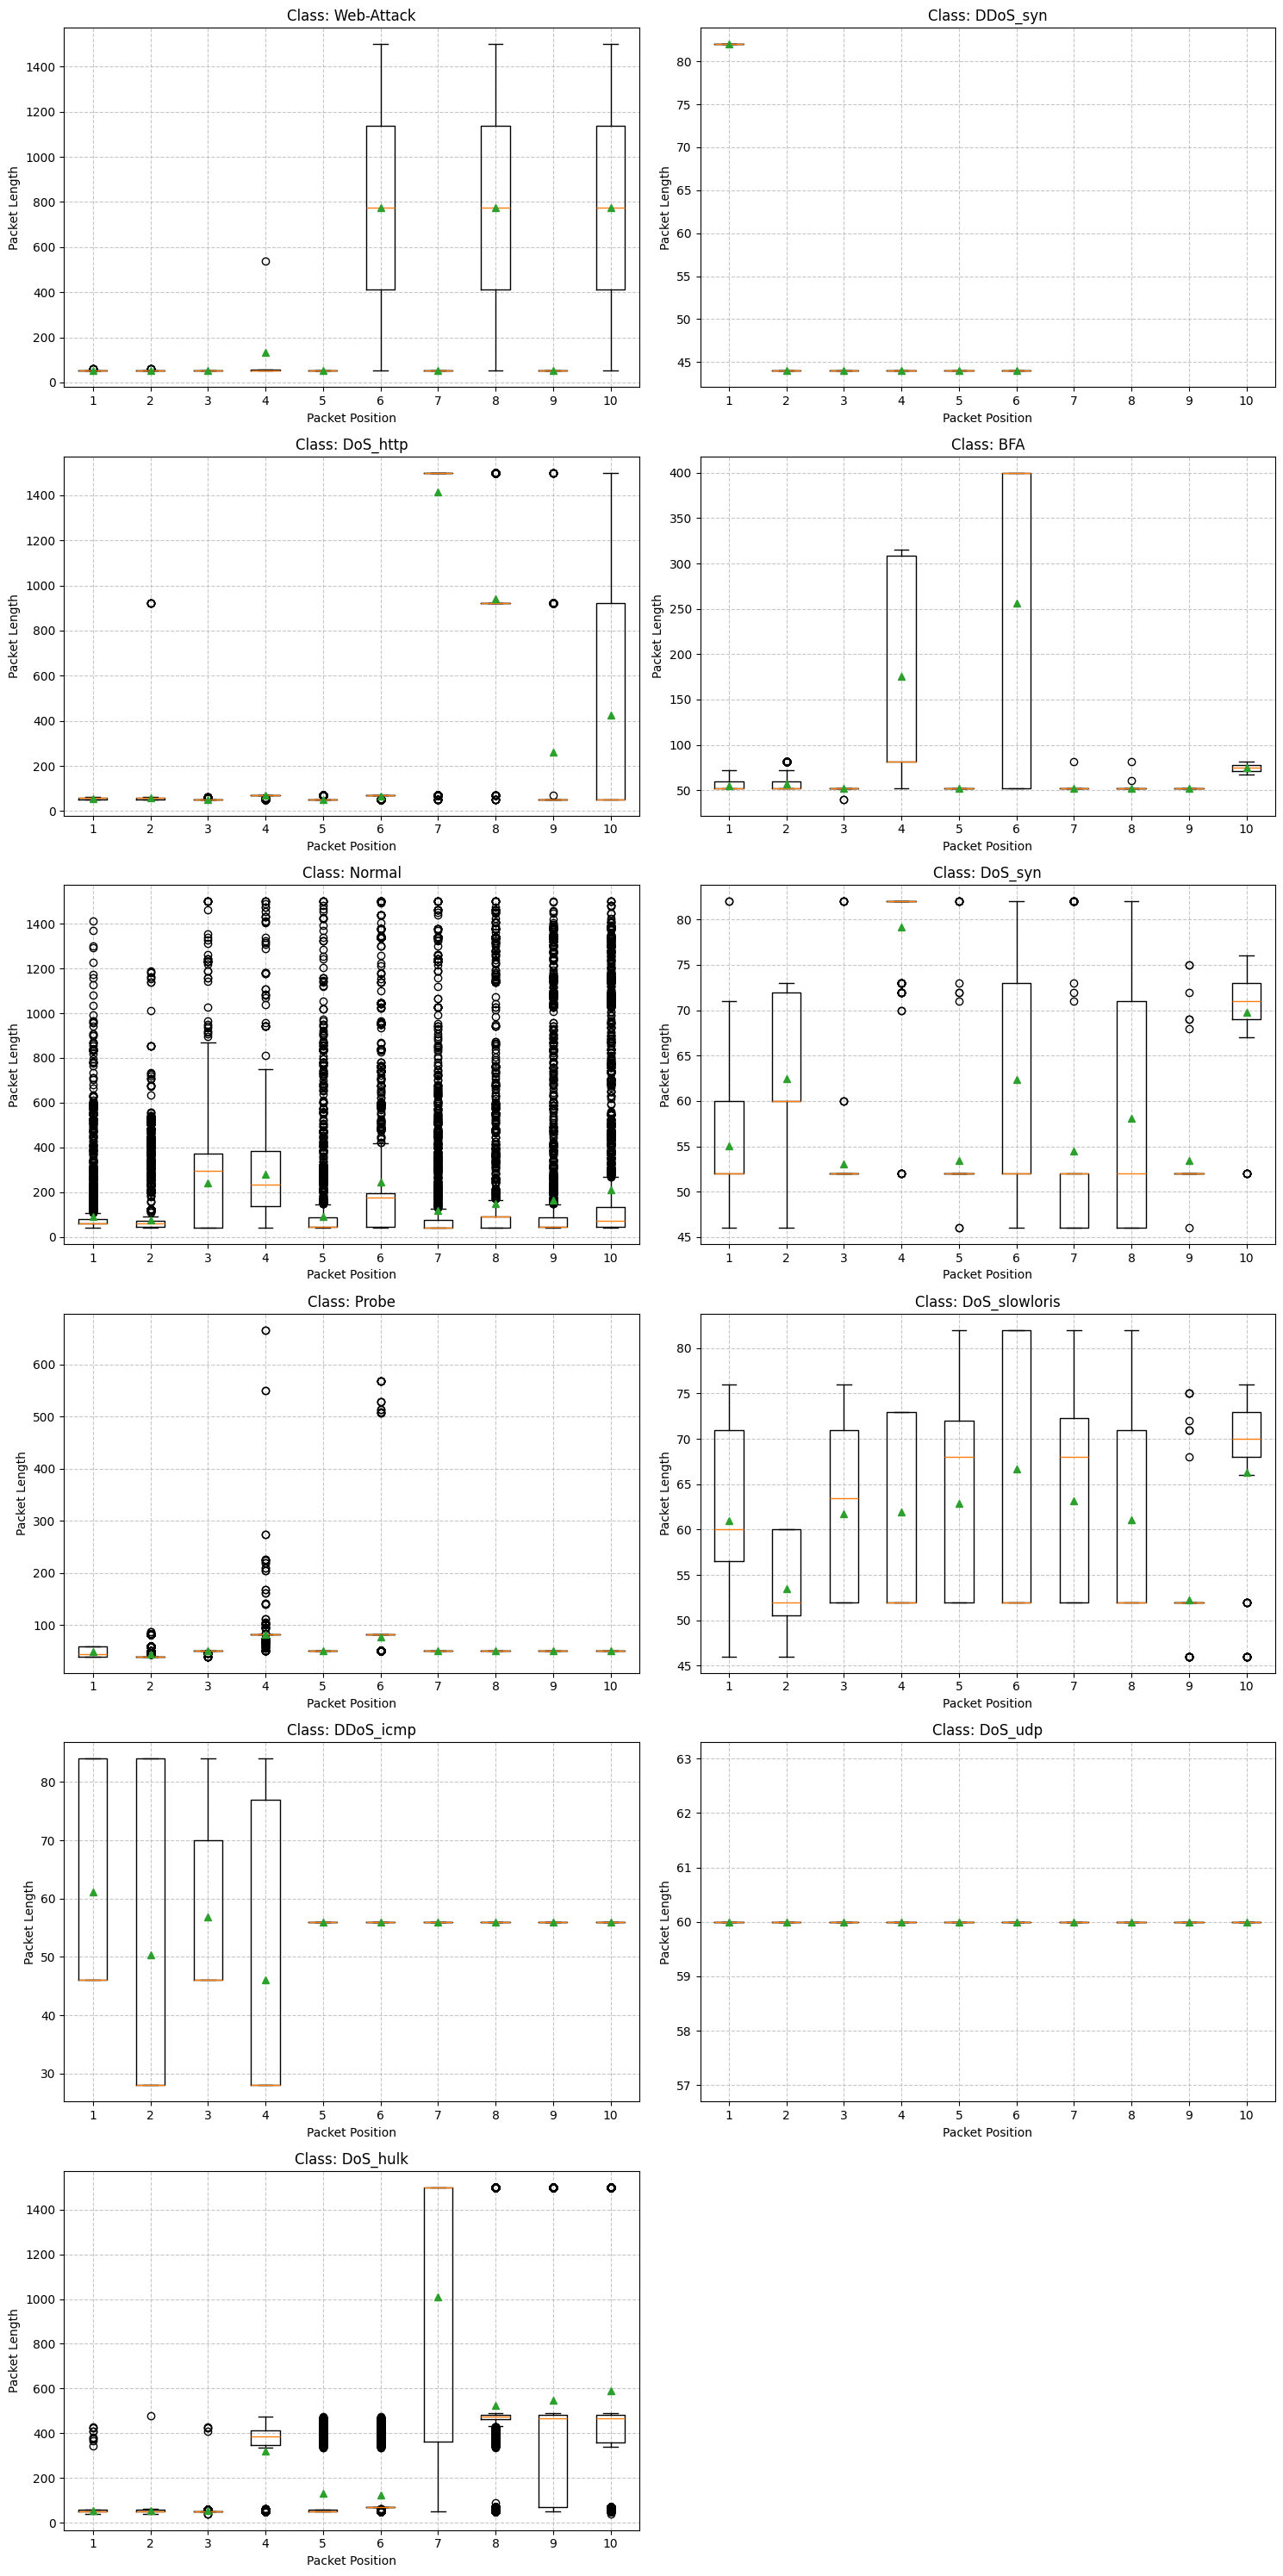

In [ ]:
# Create boxplots for each LABEL class showing distribution of packet lengths for first 10 packets

# Define the number of packets to analyze
num_packets = 10

# Preprocess the PL column to ensure all arrays have exactly 10 elements
def preprocess_packet_lengths(df, max_length=10):
    """Preprocesses the PL column to ensure each array has exactly max_length elements.
    Fills with NaN if the array is shorter than max_length."""

    def pad_or_truncate(pl_array):
        if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
            return np.full(max_length, np.nan)

        pl_array = np.array(pl_array, dtype=float)
        if len(pl_array) > max_length:
            return pl_array[:max_length]  # Truncate if longer
        else:
            return np.pad(pl_array, (0, max_length - len(pl_array)),
                          constant_values=np.nan)  # Pad with NaN if shorter

    return df['PL'].apply(pad_or_truncate)

# Create a list to store processed arrays for each row
processed_arrays = preprocess_packet_lengths(df)

# Create a DataFrame where each row is a flow and each column is a packet position
df_packets = pd.DataFrame(processed_arrays.tolist(),
                         columns=[f'Packet_{i+1}' for i in range(num_packets)],
                         index=df.index)

# Add the class label to the DataFrame
df_packets[LABEL] = df[LABEL]

# Get unique class labels
unique_classes = df[LABEL].unique()

# Set up the figure for subplots - one plot per class
num_classes = len(unique_classes)
fig, axes = plt.subplots(num_classes, 1, figsize=(12, 5 * num_classes))

# If there's only one class, make axes into a list for consistent handling
if num_classes == 1:
    axes = [axes]

# Create a boxplot for each class
for i, class_label in enumerate(unique_classes):
    # Filter data for this class
    class_data = df_packets[df_packets[LABEL] == class_label].iloc[:, :num_packets]

    # Get data for boxplot - each column becomes a box
    data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

    # Create boxplot
    axes[i].boxplot(data_to_plot, showmeans=True, meanprops={'marker':'o',
                                                 'markerfacecolor':'red',
                                                 'markeredgecolor':'black',
                                                'markersize':5})

    axes[i].set_title(f'Distribution of Packet Lengths for class: {class_label}')
    axes[i].set_xlabel('Packet Position')
    axes[i].set_ylabel('Packet Length')
    axes[i].set_xticks(range(1, num_packets + 1))
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('packet_length_distributions_by_class.png')
plt.show()

# For better visualization especially with many classes, we can also create
# a grid of subplots (optimize layout based on number of classes)
num_classes = len(unique_classes)
max_cols = 2  # Maximum number of columns in the grid
num_rows = (num_classes + max_cols - 1) // max_cols  # Calculate needed rows

fig, axes = plt.subplots(num_rows, max_cols, figsize=(15, 5 * num_rows))
# Flatten axes array for easier indexing
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Create a boxplot for each class in the grid layout
for i, class_label in enumerate(unique_classes):
    if i < len(axes):
        # Filter data for this class
        class_data = df_packets[df_packets[LABEL] == class_label].iloc[:, :num_packets]

        # Get data for boxplot
        data_to_plot = [class_data[f'Packet_{j+1}'].dropna() for j in range(num_packets)]

        # Create boxplot
        axes[i].boxplot(data_to_plot, showmeans=True)
        axes[i].set_title(f'Class: {class_label}')
        axes[i].set_xlabel('Packet Position')
        axes[i].set_ylabel('Packet Length')
        axes[i].set_xticks(range(1, num_packets + 1))
        axes[i].grid(True, linestyle='--', alpha=0.7)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('packet_length_grid_by_class.png')
plt.show()

Packet 1 - Count: 39296, Mean: 119.10, Median: 60.00, % >= 1500: 0.80%
Packet 2 - Count: 39296, Mean: 78.90, Median: 46.00, % >= 1500: 0.40%
Packet 3 - Count: 30604, Mean: 327.19, Median: 46.00, % >= 1500: 3.66%
Packet 4 - Count: 26746, Mean: 316.60, Median: 248.00, % >= 1500: 0.64%
Packet 5 - Count: 15479, Mean: 273.73, Median: 46.00, % >= 1500: 4.16%
Packet 6 - Count: 15022, Mean: 784.28, Median: 185.00, % >= 1500: 16.60%
Packet 7 - Count: 14321, Mean: 297.25, Median: 40.00, % >= 1500: 5.26%
Packet 8 - Count: 14036, Mean: 326.53, Median: 91.00, % >= 1500: 6.38%
Packet 9 - Count: 13303, Mean: 347.11, Median: 46.00, % >= 1500: 4.47%
Packet 10 - Count: 13210, Mean: 396.12, Median: 115.00, % >= 1500: 5.53%


<ipython-input-35-dc24108a292c>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


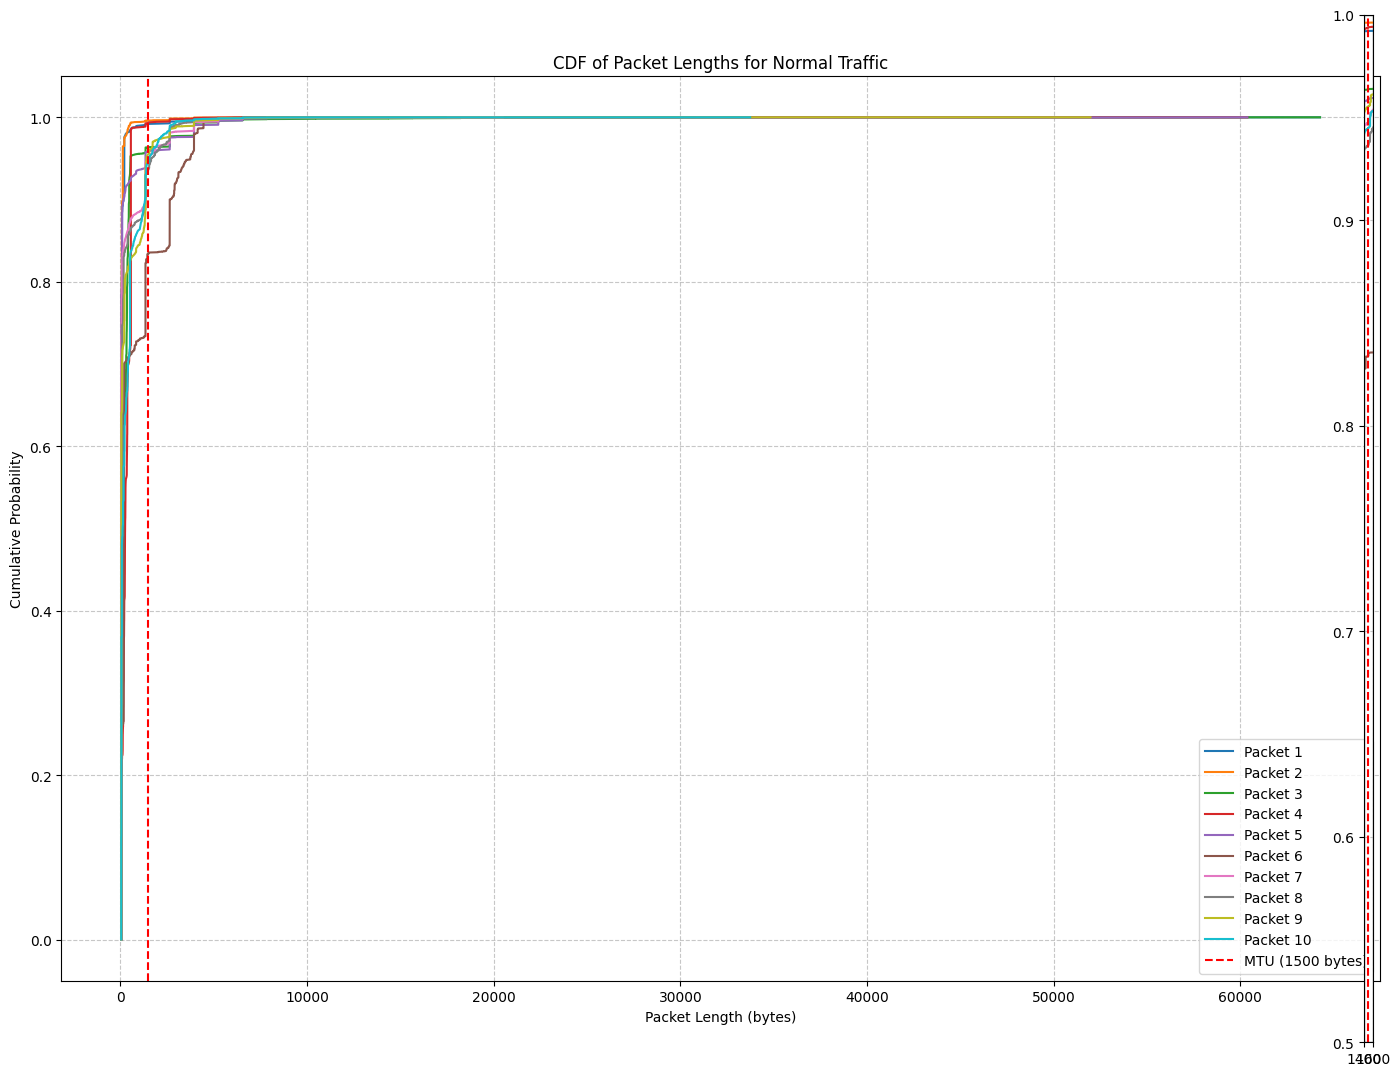

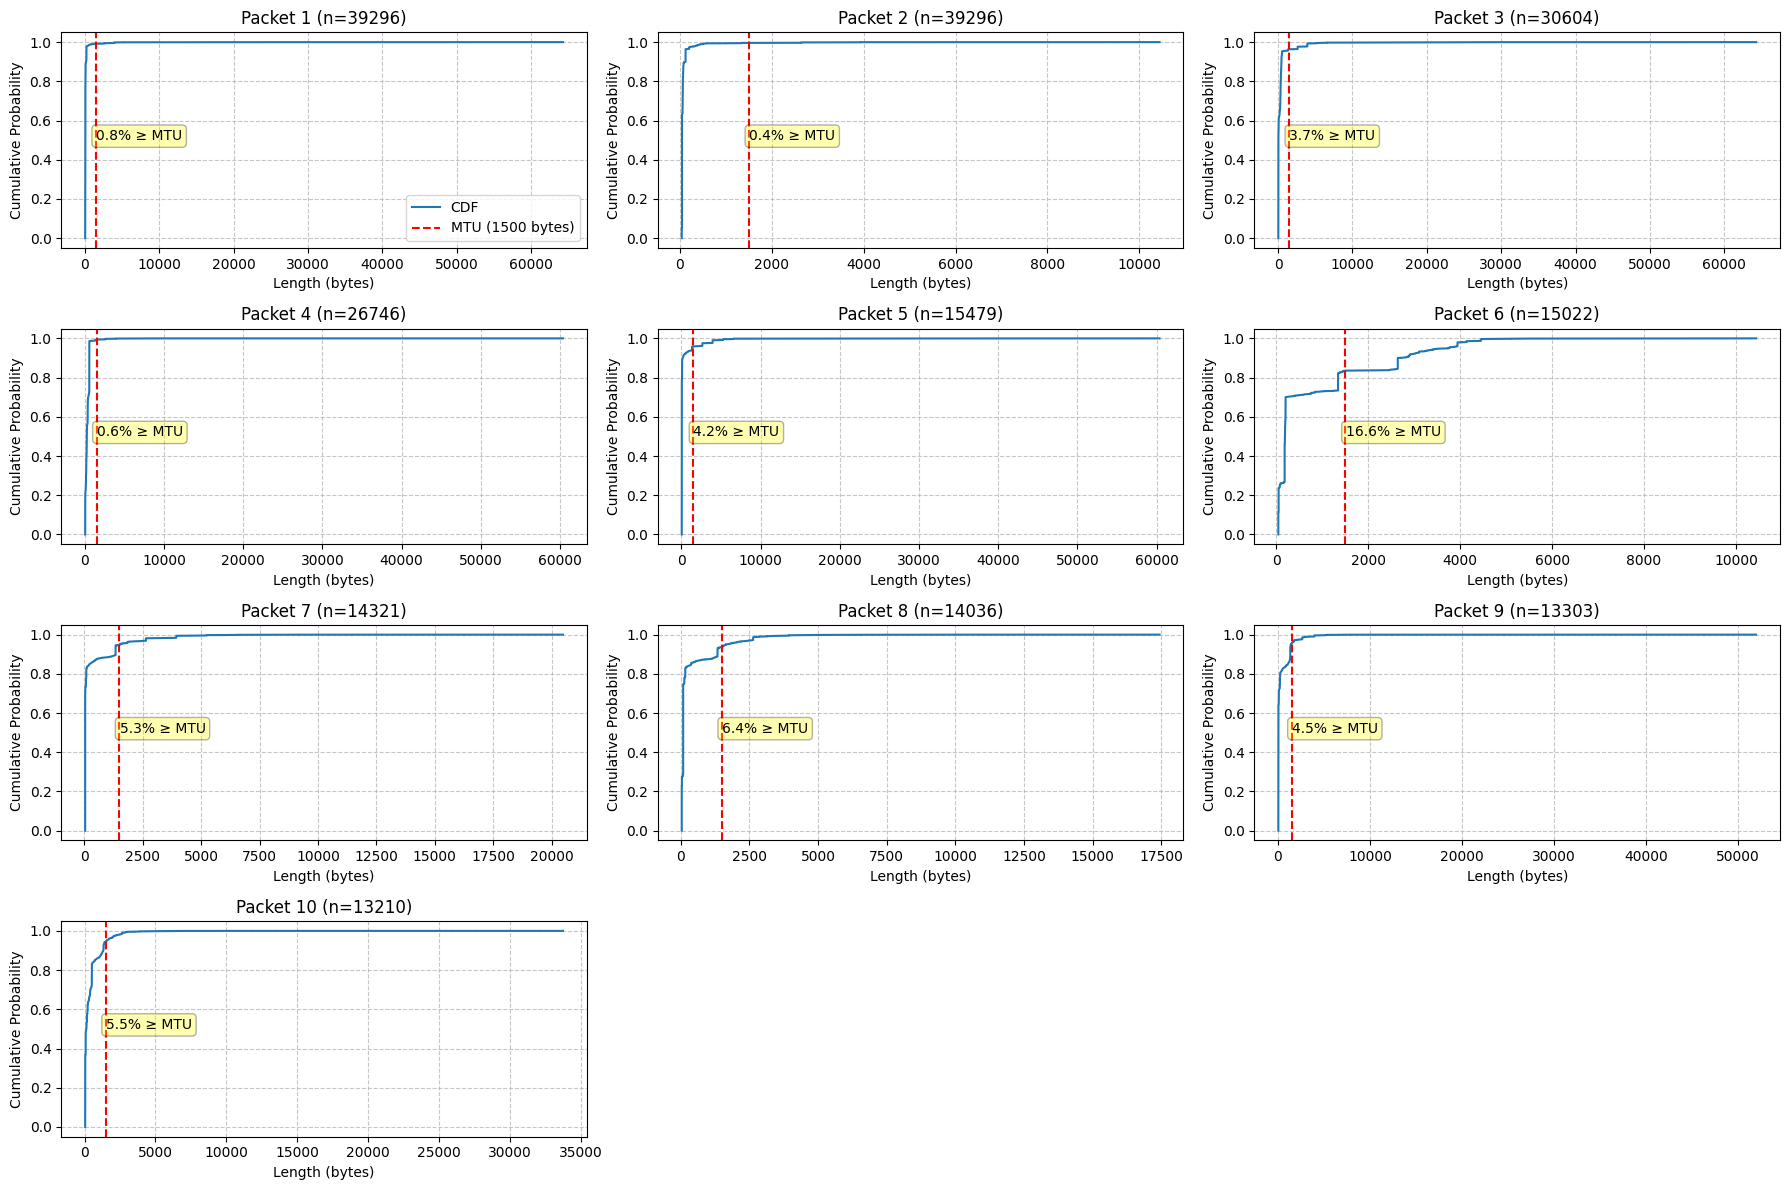

In [ ]:
# Plot CDF of packet lengths for 'Normal' class with MTU line

# Define the number of packets to analyze
num_packets = 10

# Filter the dataset to get only the 'Normal' class
df_normal = df[df[LABEL] == 'Normal'].copy()

# Preprocess the PL column to get the first 10 packets
def get_packet_lengths(pl_array, max_length=10):
    if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
        return np.full(max_length, np.nan)

    pl_array = np.array(pl_array, dtype=float)
    if len(pl_array) > max_length:
        return pl_array[:max_length]  # Truncate if longer
    else:
        return np.pad(pl_array, (0, max_length - len(pl_array)),
                      constant_values=np.nan)  # Pad with NaN if shorter

# Process arrays
processed_arrays = df_normal['PL'].apply(get_packet_lengths)

# Create a DataFrame where each row is a flow and each column is a packet position
df_normal_packets = pd.DataFrame(processed_arrays.tolist(),
                     columns=[f'Packet_{i+1}' for i in range(num_packets)],
                     index=df_normal.index)

# Create a figure for the CDF plots
plt.figure(figsize=(14, 10))

# Plot CDF for each packet position
for i in range(num_packets):
    # Get data for current packet position
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    # Calculate the proportional ranks (CDF y-values)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot the CDF
    plt.plot(sorted_data, y_values, label=f'Packet {i+1}')

    # Print statistics about this packet position
    print(f"Packet {i+1} - Count: {len(data)}, Mean: {data.mean():.2f}, Median: {data.median():.2f}, % >= 1500: {(data >= 1500).mean()*100:.2f}%")

# Add a vertical line at MTU=1500
plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

# Add labels and title
plt.title('CDF of Packet Lengths for Normal Traffic')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Cumulative Probability')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add zoom inset for the region around MTU=1500
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
axins = zoomed_inset_axes(plt.gca(), 2.5, loc='center right')  # zoom factor: 2.5

# Plot same data in the inset
for i in range(num_packets):
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axins.plot(sorted_data, y_values)

# Add the vertical line in the inset too
axins.axvline(x=1500, color='red', linestyle='--')

# Set the limits for the inset
axins.set_xlim(1400, 1600)  # x-limits around MTU
axins.set_ylim(0.5, 1.0)    # Adjust as needed to focus on the interesting part
axins.grid(True, linestyle='--', alpha=0.7)

# Mark the region of the inset
mark_inset(plt.gca(), axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('normal_packet_length_cdf.png')
plt.show()

# Now create a detailed plot focusing on a single figure with subplots for each packet position
plt.figure(figsize=(18, 12))

# Calculate number of rows and columns for the subplot grid
rows = int(np.ceil(num_packets / 3))
cols = min(num_packets, 3)

# Create subplots for each packet position
for i in range(num_packets):
    plt.subplot(rows, cols, i+1)

    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot CDF
    plt.plot(sorted_data, y_values, label='CDF')

    # Add vertical line at MTU
    plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

    # Annotate the percentage of packets with size >= MTU
    mtu_pct = (data >= 1500).mean() * 100
    plt.annotate(f"{mtu_pct:.1f}% ≥ MTU",
                 xy=(1510, 0.5),
                 xytext=(1510, 0.5),
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

    plt.title(f'Packet {i+1} (n={len(data)})')
    plt.xlabel('Length (bytes)')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add legend if it's the first subplot
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.savefig('normal_packet_length_cdf_detailed.png')
plt.show()

Packet 1 - Count: 5198, Mean: 56.08, Median: 60.00, % >= 1500: 0.00%
Packet 2 - Count: 5198, Mean: 57.12, Median: 60.00, % >= 1500: 0.00%
Packet 3 - Count: 5197, Mean: 52.13, Median: 52.00, % >= 1500: 0.00%
Packet 4 - Count: 2655, Mean: 68.50, Median: 69.00, % >= 1500: 0.00%
Packet 5 - Count: 2648, Mean: 52.98, Median: 52.00, % >= 1500: 0.00%
Packet 6 - Count: 2648, Mean: 68.20, Median: 69.00, % >= 1500: 0.00%
Packet 7 - Count: 2642, Mean: 1414.25, Median: 1500.00, % >= 1500: 94.02%
Packet 8 - Count: 2642, Mean: 939.59, Median: 923.00, % >= 1500: 4.73%
Packet 9 - Count: 442, Mean: 259.49, Median: 52.00, % >= 1500: 3.17%
Packet 10 - Count: 67, Mean: 424.61, Median: 52.00, % >= 1500: 1.49%


<ipython-input-31-d45ab4e4ef94>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


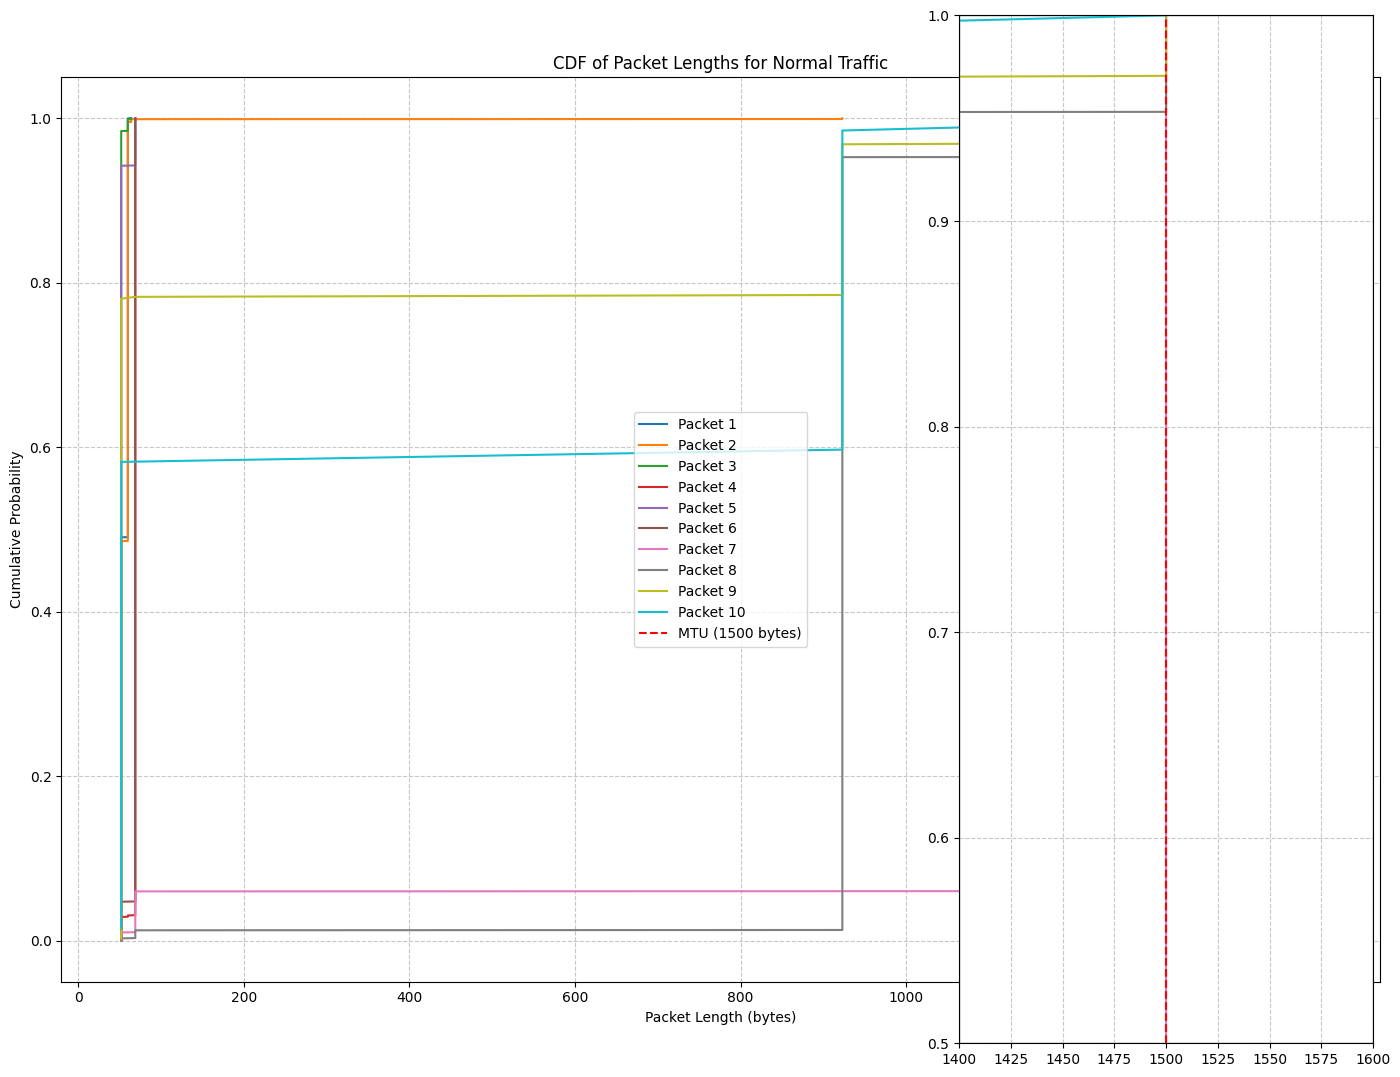

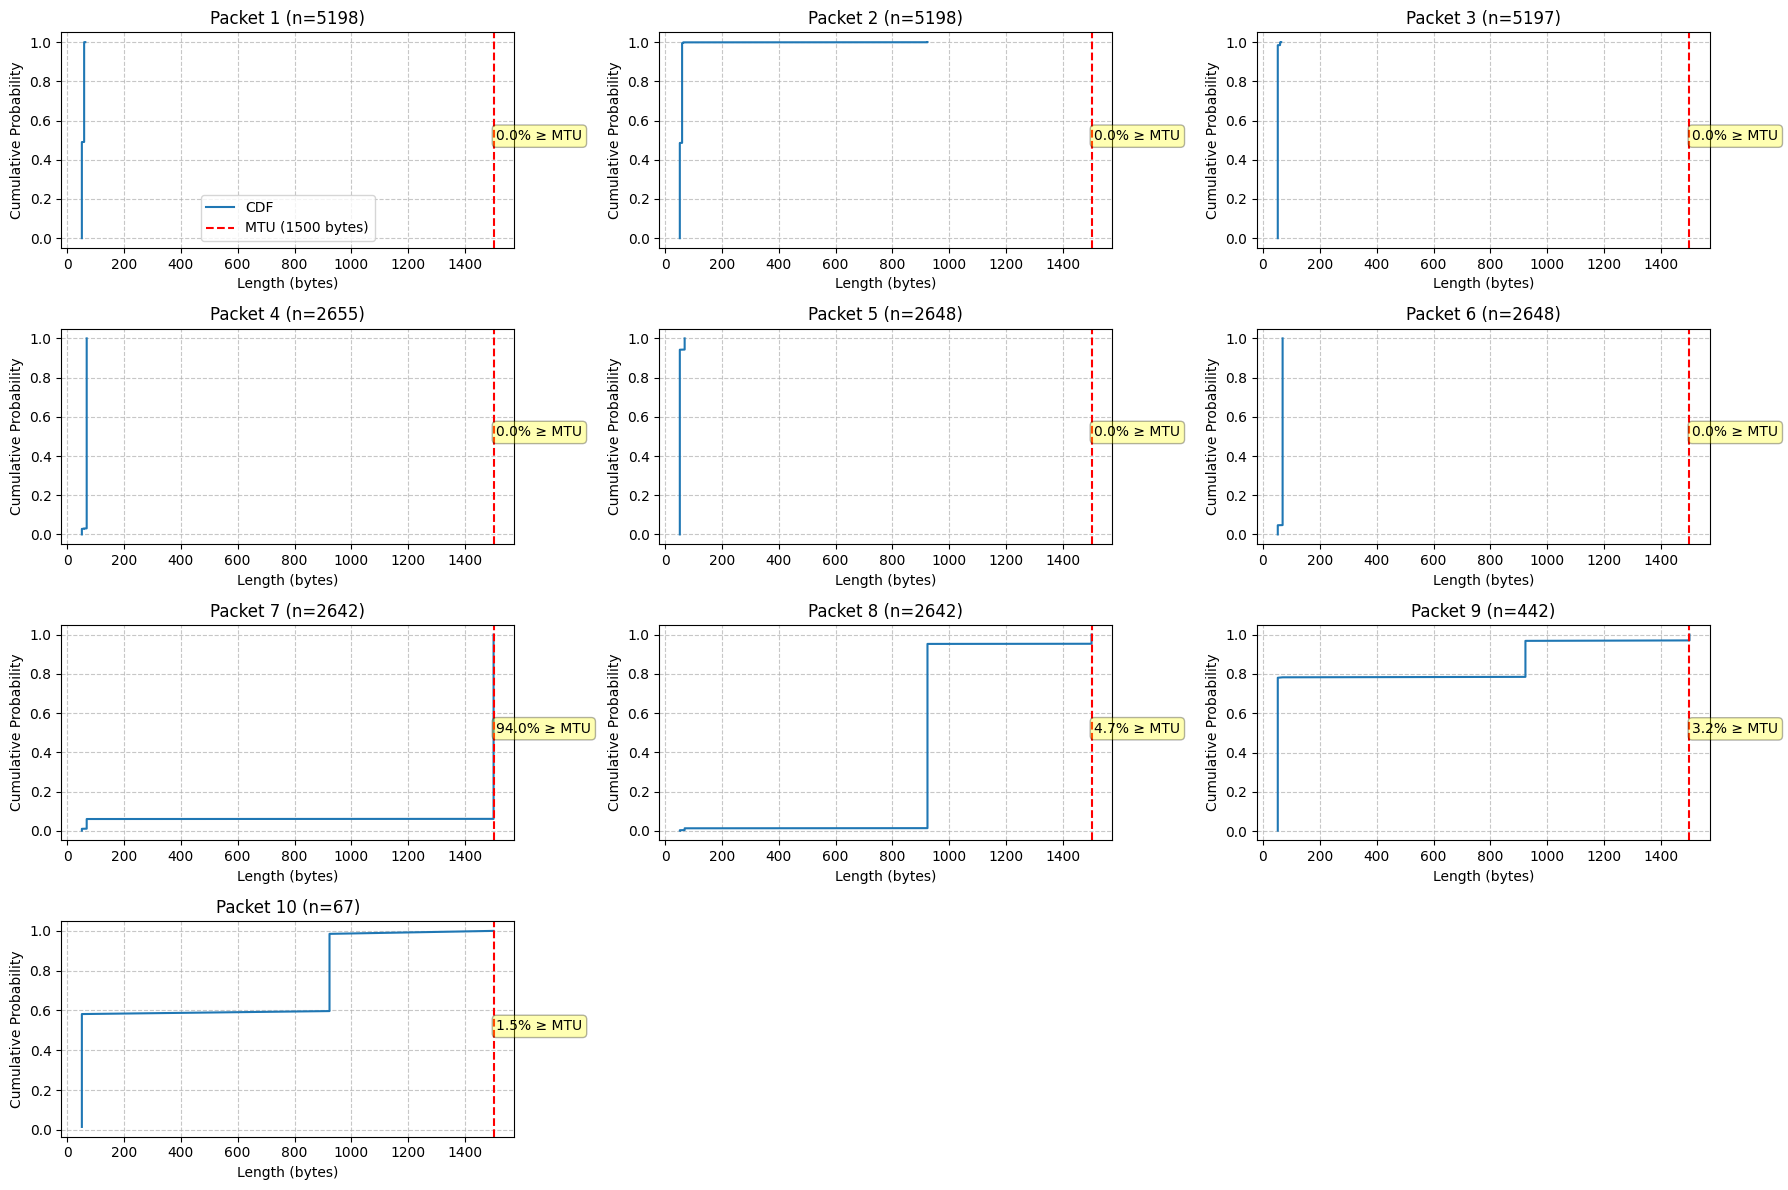

In [ ]:
# Plot CDF of packet lengths for 'Normal' class with MTU line

# Define the number of packets to analyze
num_packets = 10

# Filter the dataset to get only the 'DOS_http' class
df_normal = df[df[LABEL] == 'DoS_http'].copy()

# Preprocess the PL column to get the first 10 packets
def get_packet_lengths(pl_array, max_length=10):
    if pl_array is None or not isinstance(pl_array, (list, np.ndarray)):
        return np.full(max_length, np.nan)

    pl_array = np.array(pl_array, dtype=float)
    if len(pl_array) > max_length:
        return pl_array[:max_length]  # Truncate if longer
    else:
        return np.pad(pl_array, (0, max_length - len(pl_array)),
                      constant_values=np.nan)  # Pad with NaN if shorter

# Process arrays
processed_arrays = df_normal['PL'].apply(get_packet_lengths)

# Create a DataFrame where each row is a flow and each column is a packet position
df_normal_packets = pd.DataFrame(processed_arrays.tolist(),
                     columns=[f'Packet_{i+1}' for i in range(num_packets)],
                     index=df_normal.index)

# Create a figure for the CDF plots
plt.figure(figsize=(14, 10))

# Plot CDF for each packet position
for i in range(num_packets):
    # Get data for current packet position
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    # Calculate the proportional ranks (CDF y-values)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot the CDF
    plt.plot(sorted_data, y_values, label=f'Packet {i+1}')

    # Print statistics about this packet position
    print(f"Packet {i+1} - Count: {len(data)}, Mean: {data.mean():.2f}, Median: {data.median():.2f}, % >= 1500: {(data >= 1500).mean()*100:.2f}%")

# Add a vertical line at MTU=1500
plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

# Add labels and title
plt.title('CDF of Packet Lengths for Normal Traffic')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Cumulative Probability')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add zoom inset for the region around MTU=1500
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
axins = zoomed_inset_axes(plt.gca(), 2.5, loc='center right')  # zoom factor: 2.5

# Plot same data in the inset
for i in range(num_packets):
    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axins.plot(sorted_data, y_values)

# Add the vertical line in the inset too
axins.axvline(x=1500, color='red', linestyle='--')

# Set the limits for the inset
axins.set_xlim(1400, 1600)  # x-limits around MTU
axins.set_ylim(0.5, 1.0)    # Adjust as needed to focus on the interesting part
axins.grid(True, linestyle='--', alpha=0.7)

# Mark the region of the inset
mark_inset(plt.gca(), axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('normal_packet_length_cdf.png')
plt.show()

# Now create a detailed plot focusing on a single figure with subplots for each packet position
plt.figure(figsize=(18, 12))

# Calculate number of rows and columns for the subplot grid
rows = int(np.ceil(num_packets / 3))
cols = min(num_packets, 3)

# Create subplots for each packet position
for i in range(num_packets):
    plt.subplot(rows, cols, i+1)

    column_name = f'Packet_{i+1}'
    data = df_normal_packets[column_name].dropna()

    # Sort data for CDF
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot CDF
    plt.plot(sorted_data, y_values, label='CDF')

    # Add vertical line at MTU
    plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

    # Annotate the percentage of packets with size >= MTU
    mtu_pct = (data >= 1500).mean() * 100
    plt.annotate(f"{mtu_pct:.1f}% ≥ MTU",
                 xy=(1510, 0.5),
                 xytext=(1510, 0.5),
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

    plt.title(f'Packet {i+1} (n={len(data)})')
    plt.xlabel('Length (bytes)')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add legend if it's the first subplot
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.savefig('normal_packet_length_cdf_detailed.png')
plt.show()


In [16]:
# Crea la directory per i PDF se non esiste
output_dir = "packet_length_cdfs"
os.makedirs(output_dir, exist_ok=True)

# Define the number of packets to analyze
num_packets = 10

# Get all unique classes
unique_classes = df[LABEL].unique()
print(f"Analyzing {len(unique_classes)} traffic classes...")

# Process all packet lengths for all flows
def preprocess_packet_arrays(df, feature='PL', max_length=10):
    """Preprocess the feature arrays to ensure uniform length"""
    processed_data = {}

    for class_label in df[LABEL].unique():
        # Filter data for this class
        class_df = df[df[LABEL] == class_label]

        # Process arrays for this class
        class_arrays = []
        for arr in class_df[feature]:
            if arr is None or not isinstance(arr, (list, np.ndarray)):
                continue

            # Convert to numpy array if it's a list
            arr_np = np.array(arr, dtype=float)

            # Use only first max_length elements
            if len(arr_np) > max_length:
                arr_np = arr_np[:max_length]

            # Add to class arrays
            class_arrays.append(arr_np)

        # Store all arrays for this class
        processed_data[class_label] = class_arrays
        print(f"Class: {class_label}, Number of flows: {len(class_arrays)}")

    return processed_data

# Process all data
processed_data = preprocess_packet_arrays(df)

# Calculate CDF for each class (combining all packet lengths)
def calculate_class_cdfs(processed_data):
    """Calculate CDF data for each class by combining all packet lengths"""
    cdf_data = {}

    for class_label, arrays in processed_data.items():
        # Flatten all packet lengths for this class
        all_lengths = np.concatenate([arr for arr in arrays if len(arr) > 0])

        if len(all_lengths) > 0:
            # Sort data for CDF
            sorted_data = np.sort(all_lengths)
            # Calculate the proportional ranks (CDF y-values)
            y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

            # Store CDF data
            cdf_data[class_label] = {
                'x': sorted_data,
                'y': y_values,
                'count': len(all_lengths),
                'mean': np.mean(all_lengths),
                'median': np.median(all_lengths),
                'pct_mtu': (all_lengths >= 1500).mean() * 100
            }

    return cdf_data

# Calculate CDFs
cdf_data = calculate_class_cdfs(processed_data)

# Imposta font size globale a 18
plt.rcParams.update({'font.size': 18})

# 1. Plot CDF for all classes in a single plot (modificato)
plt.figure(figsize=(9, 5))  # Grafico più compatto

# Usa una color map
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))

# Plot CDF per ogni classe
for i, class_label in enumerate(unique_classes):
    if class_label in cdf_data:
        data = cdf_data[class_label]
        pct_mtu = data['pct_mtu']
        
        # Etichetta legenda con percentuale >= MTU
        legend_label = f"{class_label.replace('_', ' ')} ({pct_mtu:.1f}% ≥ MTU)"
        plt.plot(data['x'], data['y'], label=legend_label, color=colors[i], linewidth=2.5)

        # Print statistiche (puoi tenerlo o rimuoverlo)
        print(f"{class_label} - Packets: {data['count']}, Mean: {data['mean']:.2f}, "
              f"Median: {data['median']:.2f}, % ≥ MTU: {pct_mtu:.2f}%")

# Linea verticale a MTU
plt.axvline(x=1500, color='red', linestyle='--', label='MTU (1500 bytes)')

# Etichette e titolo
plt.title('')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Cumulative Probability')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=12)

# Limite asse X a 3000
plt.xlim(0, 3000)

plt.tight_layout()
pdf_path = os.path.join(output_dir, 'all_classes_cdf.pdf')
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
print(f"Salvato grafico completo in: {pdf_path}")
plt.close()

print(f"Tutti i grafici CDF sono stati salvati nella directory: {output_dir}")

Analyzing 12 traffic classes...
Class: Web-Attack, Number of flows: 174
Class: DDoS_syn, Number of flows: 500
Class: DoS_http, Number of flows: 5302
Class: BFA, Number of flows: 1405
Class: Normal, Number of flows: 39296
Class: DoS_syn, Number of flows: 380
Class: Probe, Number of flows: 73615
Class: DoS_slowloris, Number of flows: 306
Class: DDoS_icmp, Number of flows: 121331
Class: DoS_udp, Number of flows: 50
Class: BOTNET, Number of flows: 164
Class: DoS_hulk, Number of flows: 15205
Web-Attack - Packets: 782, Mean: 308.79, Median: 52.00, % ≥ MTU: 10.87%
DDoS_syn - Packets: 2291, Mean: 52.29, Median: 44.00, % ≥ MTU: 0.00%
DoS_http - Packets: 29669, Mean: 265.22, Median: 60.00, % ≥ MTU: 8.93%
BFA - Packets: 6636, Mean: 201.73, Median: 52.00, % ≥ MTU: 6.15%
Normal - Packets: 221313, Mean: 275.49, Median: 60.00, % ≥ MTU: 3.56%
DoS_syn - Packets: 1939, Mean: 59.85, Median: 52.00, % ≥ MTU: 0.00%
Probe - Packets: 280291, Mean: 53.99, Median: 52.00, % ≥ MTU: 0.00%
DoS_slowloris - Packets: 

## Generazione grafici risultati

In [3]:
!unzip images.zip

Archive:  images.zip
   creating: images
   creating: images/bic_0to10
  inflating: images/bic_0to10/exp_name.info  
   creating: images/bic_0to10/material
  inflating: images/bic_0to10/material/per_class_metrics_metrics_f1_score_macro-material.parquet  
   creating: images/bic_0to10/img
   creating: images/bic_0to10/img/per_class_metrics
  inflating: images/bic_0to10/img/per_class_metrics/lp_average_per_class_metrics_Lopez17CNN_f1_score_draft.pdf  
  inflating: images/bic_0to10/img/per_class_metrics/lp_average_per_class_metrics_Lopez17CNN_f1_score_draft.png  
  inflating: images/bic_0to10/img/per_class_metrics/lp_average_per_class_metrics_Lopez17CNN_f1_scorebase_draft.pdf  
  inflating: images/bic_0to10/img/per_class_metrics/lp_average_per_class_metrics_Lopez17CNN_f1_scorebase_draft.png  
   creating: images/icarlp_0to10
  inflating: images/icarlp_0to10/exp_name.info  
   creating: images/icarlp_0to10/material
  inflating: images/icarlp_0to10/material/per_class_metrics_metrics_f1_scor

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

# Impostazioni grafiche generali
plt.rcParams.update({'font.size': 14})
sns.set_style("whitegrid")

# Configurazione
output_dir = 'barplot_results'
os.makedirs(output_dir, exist_ok=True)

# Approcci da analizzare (adattati ai nomi delle cartelle)
approcci = ['bic_0to10', 'bic_memento_0to10', 'icarlp_0to10', 'jointftMEM_0to10', 
            'jointftSENZAMEM_0to10', 'lwf_0to10', 'scratch_0to10']

# Nomi leggibili per gli approcci
appr_dict = {
    'bic_0to10': 'BiC',
    'bic_memento_0to10': 'BiC+M',
    'icarlp_0to10': 'iCaRL',
    'jointftMEM_0to10': 'JFT+M',
    'jointftSENZAMEM_0to10': 'JFT',
    'lwf_0to10': 'LwF',
    'scratch_0to10': 'Scratch'
}

# Colori personalizzati per gli approcci
colori_approcci = {
    'BiC': '#1f77b4',           # blu
    'BiC+M': '#ff7f0e',         # arancione
    'iCaRL': '#2ca02c',         # verde
    'JFT+M': '#d62728',         # rosso
    'JFT': '#9467bd',           # viola
    'LwF': '#8c564b',           # marrone
    'Scratch': '#e377c2'        # rosa
}

def carica_e_filtra_dati():
    """Carica e filtra tutti i file parquet dalle cartelle degli approcci."""
    tutti_dati = []
    
    for approccio in approcci:
        # Cerca tutti i file parquet nella cartella dell'approccio
        pattern = f"images/{approccio}/material/*.parquet"
        file_paths = glob.glob(pattern)
        
        if not file_paths:
            print(f"Nessun file trovato per l'approccio: {approccio}")
            continue
        
        # Leggi e combina tutti i file parquet di questo approccio
        dfs = []
        for file_path in file_paths:
            try:
                df = pd.read_parquet(file_path)
                df['file'] = os.path.basename(file_path)
                df['approccio'] = appr_dict.get(approccio, approccio)  # Usa il nome leggibile
                
                # Converti F1 Score in formato numerico
                df['F1 Score'] = pd.to_numeric(df['F1 Score'], errors='coerce')
                
                # Filtra solo per Episodio 0 e 1
                df_filtrato = df[df['Episode'].isin([0, 1])]
                
                dfs.append(df_filtrato)
            except Exception as e:
                print(f"Errore nella lettura del file {file_path}: {e}")
        
        if dfs:
            tutti_dati.append(pd.concat(dfs, ignore_index=True))
    
    if tutti_dati:
        return pd.concat(tutti_dati, ignore_index=True)
    return pd.DataFrame()

def crea_confronto_episodi():
    """Crea barplot per confrontare i risultati degli Episodi 0 e 1."""
    df = carica_e_filtra_dati()
    
    if df.empty:
        print("Nessun dato disponibile per il grafico.")
        return
    
    # Raggruppamento per approccio, episodio e tipo
    df_media = df.groupby(['approccio', 'Episode', 'Type'])['F1 Score'].mean().reset_index()
    
    # Calcola deviazione standard per le barre di errore
    df_std = df.groupby(['approccio', 'Episode', 'Type'])['F1 Score'].std().reset_index()
    df_std.rename(columns={'F1 Score': 'std'}, inplace=True)
    
    # Unisci media e deviazione standard
    df_plot = pd.merge(df_media, df_std, on=['approccio', 'Episode', 'Type'])
    
    # Ordina gli approcci in base alla performance media (decrescente)
    ordine_approcci = df_plot.groupby('approccio')['F1 Score'].mean().sort_values(ascending=False).index.tolist()
    
    # Filtriamo per tipo "All" (tutti)
    df_all = df_plot[df_plot['Type'] == 'All']
    
    # ----- CONFRONTO EPISODI PER APPROCCIO -----
    plt.figure(figsize=(14, 8))
    
    ax = sns.barplot(
        x='approccio', 
        y='F1 Score', 
        hue='Episode',
        data=df_all,
        order=ordine_approcci,
        palette=['#1f77b4', '#ff7f0e'],  # Colori per Episodio 0 e 1
        errorbar=('ci', 95),
        capsize=0.1
    )
    
    plt.title('Confronto F1 Score tra Episodio 0 e Episodio 1 (Tutte le Classi)', fontsize=16)
    plt.xlabel('Approccio', fontsize=14)
    plt.ylabel('F1 Score (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Aggiungi valori sopra le barre
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/confronto_episodi_per_approccio.pdf', format='pdf')
    plt.savefig(f'{output_dir}/confronto_episodi_per_approccio.png', dpi=300)
    plt.close()
    
    # ----- CONFRONTO APPROCCI PER EPISODIO -----
    plt.figure(figsize=(14, 8))
    
    ax = sns.barplot(
        x='Episode', 
        y='F1 Score', 
        hue='approccio',
        data=df_all,
        hue_order=ordine_approcci,
        palette=colori_approcci,
        errorbar=('ci', 95),
        capsize=0.1
    )
    
    plt.title('F1 Score per Episodio e Approccio (Tutte le Classi)', fontsize=16)
    plt.xlabel('Episodio', fontsize=14)
    plt.ylabel('F1 Score (%)', fontsize=14)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Aggiungi legenda con dimensione del font personalizzata
    plt.legend(fontsize=12, title_fontsize=14, title='Approccio')
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/f1_per_episodio_e_approccio.pdf', format='pdf')
    plt.savefig(f'{output_dir}/f1_per_episodio_e_approccio.png', dpi=300)
    plt.close()
    
    # ----- GRAFICO DIFFERENZA EPISODI -----
    crea_grafico_differenza_episodi(df_all, ordine_approcci)
    
    # ----- ANALISI PER OGNI TIPO DI CLASSE -----
    for tipo in df_plot['Type'].unique():
        if tipo == 'Base':  # Salta Base perché potrebbe essere presente solo nell'episodio 0
            continue
            
        df_tipo = df_plot[df_plot['Type'] == tipo]
        
        # Verifica che ci siano dati per entrambi gli episodi
        if not all(episodio in df_tipo['Episode'].unique() for episodio in [0, 1]):
            print(f"Dati insufficienti per entrambi gli episodi nel tipo {tipo}. Salta.")
            continue
        
        plt.figure(figsize=(14, 8))
        
        ax = sns.barplot(
            x='approccio', 
            y='F1 Score', 
            hue='Episode',
            data=df_tipo,
            order=ordine_approcci,
            palette=['#1f77b4', '#ff7f0e'],  # Colori per Episodio 0 e 1
            errorbar=('ci', 95),
            capsize=0.1
        )
        
        plt.title(f'Confronto F1 Score tra Episodio 0 e Episodio 1 (Classi {tipo})', fontsize=16)
        plt.xlabel('Approccio', fontsize=14)
        plt.ylabel('F1 Score (%)', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        
        # Aggiungi valori sopra le barre
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f', fontsize=10)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/confronto_episodi_per_approccio_{tipo.lower()}.pdf', format='pdf')
        plt.savefig(f'{output_dir}/confronto_episodi_per_approccio_{tipo.lower()}.png', dpi=300)
        plt.close()

def crea_grafico_differenza_episodi(df, ordine_approcci):
    """Crea un grafico che mostra la differenza di performance tra Episodio 0 e Episodio 1."""
    # Pivot table per confrontare direttamente Episodio 0 vs Episodio 1
    pivot_df = df.pivot_table(
        index='approccio', 
        columns='Episode', 
        values='F1 Score', 
        aggfunc='mean'
    ).reset_index()
    
    # Calcola la differenza tra Episodio 0 e Episodio 1
    pivot_df['Differenza'] = pivot_df[0] - pivot_df[1]
    
    # Ordina usando l'ordine specifico
    pivot_df = pivot_df.set_index('approccio')
    pivot_df = pivot_df.reindex(ordine_approcci).reset_index()
    
    # Crea un grafico a barre raggruppate
    fig, ax = plt.subplots(figsize=(14, 8))
    
    width = 0.35
    x = np.arange(len(pivot_df))
    
    rects1 = ax.bar(x - width/2, pivot_df[0], width, label='Episodio 0', color='#4C72B0')
    rects2 = ax.bar(x + width/2, pivot_df[1], width, label='Episodio 1', color='#55A868')
    
    # Aggiungi etichette, titolo e personalizzazione assi
    ax.set_xlabel('Approccio', fontsize=14)
    ax.set_ylabel('F1 Score (%)', fontsize=14)
    ax.set_title('Confronto F1 Score: Episodio 0 vs Episodio 1', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(pivot_df['approccio'], rotation=45, ha='right', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Aggiungi valori sopra le barre
    for rect1, rect2, diff in zip(rects1, rects2, pivot_df['Differenza']):
        height1 = rect1.get_height()
        height2 = rect2.get_height()
        ax.annotate(f'{height1:.1f}%', xy=(rect1.get_x() + rect1.get_width()/2, height1),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
        ax.annotate(f'{height2:.1f}%', xy=(rect2.get_x() + rect2.get_width()/2, height2),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
        
        # Aggiungi la differenza tra Episodio 0 e Episodio 1
        ax.annotate(f'Δ: {diff:.1f}%', 
                   xy=((rect1.get_x() + rect2.get_x() + rect2.get_width())/2, min(height1, height2)/2),
                   xytext=(0, 0), textcoords="offset points", ha='center', va='center',
                   bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/confronto_episodio0_vs_episodio1.pdf', format='pdf')
    plt.savefig(f'{output_dir}/confronto_episodio0_vs_episodio1.png', dpi=300)
    plt.close()

# Esegui le funzioni
if __name__ == "__main__":
    crea_confronto_episodi()